In [1]:
# Importer les bibliothèques nécessaires
import pandas as pd
pd.set_option('display.max_columns', 375)
import numpy as np
from category_encoders import CountEncoder
from sklearn.metrics import mean_squared_error
from IPython.display import display

# Préparation des données

Import des données puis séparation en ensemble d'entrainement et de validation

In [2]:
# Charger les données
print("Chargement des données...")
X_train = pd.read_csv("/Users/sabine/Desktop/CYTech/S3/Data_science/ProjetFinal/03.Données/train_input.csv", sep=',')
y_train = pd.read_csv("/Users/sabine/Desktop/CYTech/S3/Data_science/ProjetFinal/03.Données/train_output.csv", sep=',')  # Convertir en Series si nécessaire

# On affiche le nombre de lignes et de colonnes
print("Nombre de lignes et de colonnes dans X_train :", X_train.shape)
print("Nombre de lignes et de colonnes dans y_train :", y_train.shape)


Chargement des données...


/var/folders/w9/r08bt9mx78n17by79wcdsq380000gn/T/ipykernel_66142/1562171399.py:3: DtypeWarning: Columns (16,17,29,30,31,126,128,129,132,133,135,138,371) have mixed types. Specify dtype option on import or set low_memory=False.
  X_train = pd.read_csv("/Users/sabine/Desktop/CYTech/S3/Data_science/ProjetFinal/03.Données/train_input.csv", sep=',')


Nombre de lignes et de colonnes dans X_train : (383610, 374)
Nombre de lignes et de colonnes dans y_train : (383610, 5)


In [3]:
# Afficher un aperçu des données pour vérifier leur chargement
print("Aperçu de X_train :")
display(X_train.head())
print("Aperçu de y_train :")
display(y_train.head())

Aperçu de X_train :


,ID,ACTIVIT2,VOCATION,TYPERS,ANCIENNETE,ADOSS,CARACT1,CARACT2,CARACT3,INDEM1,DUREE_REQANEUF,CARACT4,CARACT5,TYPBAT1,INDEM2,TYPBAT2,FRCH1,FRCH2,DEROG1,DEROG2,DEROG3,DEROG4,DEROG5,DEROG6,DEROG7,DEROG8,DEROG9,DEROG10,DEROG11,DEROG12,DEROG13,DEROG14,DEROG15,DEROG16,TAILLE1,TAILLE2,CA1,CA2,CA3,KAPITAL1,KAPITAL2,KAPITAL3,KAPITAL4,KAPITAL5,KAPITAL6,KAPITAL7,KAPITAL8,KAPITAL9,KAPITAL10,KAPITAL11,KAPITAL12,KAPITAL13,KAPITAL14,KAPITAL15,KAPITAL16,KAPITAL17,KAPITAL18,KAPITAL19,KAPITAL20,KAPITAL21,KAPITAL22,KAPITAL23,KAPITAL24,KAPITAL25,KAPITAL26,KAPITAL27,KAPITAL28,KAPITAL29,KAPITAL30,KAPITAL31,KAPITAL32,KAPITAL33,KAPITAL34,KAPITAL35,KAPITAL36,KAPITAL37,KAPITAL38,KAPITAL39,KAPITAL40,KAPITAL41,KAPITAL42,KAPITAL43,SURFACE1,SURFACE2,SURFACE3,SURFACE4,SURFACE5,SURFACE6,SURFACE7,SURFACE8,SURFACE9,SURFACE10,SURFACE11,SURFACE12,SURFACE13,SURFACE14,SURFACE15,SURFACE16,SURFACE17,SURFACE18,SURFACE19,SURFACE20,SURFACE21,NBBAT1,NBBAT2,NBBAT3,NBBAT4,NBBAT5,NBBAT6,NBBAT7,NBBAT8,NBBAT9,NBBAT10,NBBAT11,NBBAT13,NBBAT14,TAILLE3,TAILLE4,NBSINCONJ,NBSINSTRT,COEFASS,RISK1,RISK2,RISK3,RISK4,RISK5,RISK6,RISK7,RISK8,RISK9,RISK10,RISK11,RISK12,RISK13,EQUIPEMENT1,EQUIPEMENT2,EQUIPEMENT3,EQUIPEMENT4,EQUIPEMENT5,EQUIPEMENT6,EQUIPEMENT7,DISTANCE_111,DISTANCE_112,DISTANCE_121,DISTANCE_122,DISTANCE_123,DISTANCE_124,DISTANCE_131,DISTANCE_132,DISTANCE_133,DISTANCE_141,DISTANCE_142,DISTANCE_211,DISTANCE_212,DISTANCE_213,DISTANCE_221,DISTANCE_222,DISTANCE_223,DISTANCE_231,DISTANCE_242,DISTANCE_243,DISTANCE_244,DISTANCE_311,DISTANCE_312,DISTANCE_313,DISTANCE_321,DISTANCE_322,DISTANCE_323,DISTANCE_324,DISTANCE_331,DISTANCE_332,DISTANCE_333,DISTANCE_334,DISTANCE_335,DISTANCE_411,DISTANCE_412,DISTANCE_421,DISTANCE_422,DISTANCE_423,DISTANCE_511,DISTANCE_512,DISTANCE_521,DISTANCE_522,DISTANCE_523,PROPORTION_11,PROPORTION_12,PROPORTION_13,PROPORTION_14,PROPORTION_21,PROPORTION_22,PROPORTION_23,PROPORTION_24,PROPORTION_31,PROPORTION_32,PROPORTION_33,PROPORTION_41,PROPORTION_42,PROPORTION_51,PROPORTION_52,MEN,MEN_PAUV,MEN_1IND,MEN_5IND,MEN_PROP,MEN_FMP,MEN_COLL,MEN_MAIS,LOG_AVA1,LOG_A1_A2,LOG_A2_A3,LOG_APA3,LOG_INC,LOG_SOC,IND,IND_0_Y1,IND_Y1_Y2,IND_Y2_Y3,IND_Y3_Y4,IND_Y4_Y5,IND_Y5_Y6,IND_Y6_Y7,IND_Y7_Y8,IND_Y8_Y9,IND_Y9,IND_INC,IND_SNV,MEN_SURF,DISTANCE_1,DISTANCE_2,ALTITUDE_1,ALTITUDE_2,ALTITUDE_3,ALTITUDE_4,ALTITUDE_5,BDTOPO_BAT_MAX_HAUTEUR_MAX,HAUTEUR,HAUTEUR_MAX,BDTOPO_BAT_MAX_HAUTEUR,ZONE_VENT,NB_CASERNES,NBJTX25_MM_A,NBJTX25_MMAX_A,NBJTX25_MSOM_A,NBJTX0_MM_A,NBJTX0_MMAX_A,NBJTX0_MSOM_A,NBJTXI27_MM_A,NBJTXI27_MMAX_A,NBJTXI27_MSOM_A,NBJTXS32_MM_A,NBJTXS32_MMAX_A,NBJTXS32_MSOM_A,NBJTXI20_MM_A,NBJTXI20_MMAX_A,NBJTXI20_MSOM_A,NBJTX30_MM_A,NBJTX30_MMAX_A,NBJTX30_MSOM_A,NBJTX35_MM_A,NBJTX35_MMAX_A,NBJTX35_MSOM_A,NBJTN10_MM_A,NBJTN10_MMAX_A,NBJTN10_MSOM_A,NBJTNI10_MM_A,NBJTNI10_MMAX_A,NBJTNI10_MSOM_A,NBJTN5_MM_A,NBJTN5_MMAX_A,NBJTN5_MSOM_A,NBJTNS25_MM_A,NBJTNS25_MMAX_A,NBJTNS25_MSOM_A,NBJTNI15_MM_A,NBJTNI15_MMAX_A,NBJTNI15_MSOM_A,NBJTNI20_MM_A,NBJTNI20_MMAX_A,NBJTNI20_MSOM_A,NBJTNS20_MM_A,NBJTNS20_MMAX_A,NBJTNS20_MSOM_A,NBJTMS24_MM_A,NBJTMS24_MMAX_A,NBJTMS24_MSOM_A,TAMPLIAB_VOR_MM_A,TAMPLIAB_VOR_MMAX_A,TAMPLIM_VOR_MM_A,TAMPLIM_VOR_MMAX_A,TM_VOR_MM_A,TM_VOR_MMAX_A,TMM_VOR_MM_A,TMM_VOR_MMAX_A,TMMAX_VOR_MM_A,TMMAX_VOR_MMAX_A,TMMIN_VOR_MM_A,TMMIN_VOR_MMAX_A,TN_VOR_MM_A,TN_VOR_MMAX_A,TNAB_VOR_MM_A,TNAB_VOR_MMAX_A,TNMAX_VOR_MM_A,TNMAX_VOR_MMAX_A,TX_VOR_MM_A,TX_VOR_MMAX_A,TXAB_VOR_MM_A,TXAB_VOR_MMAX_A,TXMIN_VOR_MM_A,TXMIN_VOR_MMAX_A,NBJFF10_MM_A,NBJFF10_MMAX_A,NBJFF10_MSOM_A,NBJFF16_MM_A,NBJFF16_MMAX_A,NBJFF16_MSOM_A,NBJFF28_MM_A,NBJFF28_MMAX_A,NBJFF28_MSOM_A,NBJFXI3S10_MM_A,NBJFXI3S10_MMAX_A,NBJFXI3S10_MSOM_A,NBJFXI3S16_MM_A,NBJFXI3S16_MMAX_A,NBJFXI3S16_MSOM_A,NBJFXI3S28_MM_A,NBJFXI3S28_MMAX_A,NBJFXI3S28_MSOM_A,NBJFXY8_MM_A,NBJFXY8_MMAX_A,NBJFXY8_MSOM_A,NBJFXY10_MM_A,NBJFXY10_MMAX_A,NBJFXY10_MSOM_A,NBJFXY15_MM_A,NBJFXY15_MMAX_A,NBJFXY15_MSOM_A,FFM_VOR_MM_A,FFM_VOR_MMAX_A,FXI3SAB_VOR_MM_A,FXI3SAB_VOR_MMAX_A,FXIAB_VOR_MM_A,FXIAB_VOR_MMAX_A,FXYAB_VOR_MM_A,FXYAB_VOR_MMAX_A,FFM_VOR_COM_MM_A_Y

Aperçu de y_train :


,ID,FREQ,CM,ANNEE_ASSURANCE,CHARGE
0,1,0.0,0.0,1.000000,0.0
1,2,0.0,0.0,1.000000,0.0
2,3,0.0,0.0,0.402740,0.0
3,4,0.0,0.0,0.246575,0.0
4,5,0.0,0.0,0.838356,0.0


In [4]:
# Avant cela, on organise les données en ordre croissant selon la colonne 'id'
X_train = X_train.sort_values(by='ID')
y_train = y_train.sort_values(by='ID')
# On réinitialise les index
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Répartition entre données d'entraînement et de validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Afficher le nombre de lignes et de colonnes après la séparation
print("Nombre de lignes et de colonnes après séparation :")
print("X_train :", X_train.shape)
print("X_val :", X_val.shape)
print("y_train :", y_train.shape)
print("y_val :", y_val.shape)

# Afficher un aperçu des données d'entraînement et de validation
print("Aperçu de X_train :")
display(X_train.head())
print("Aperçu de X_val :")
display(X_val.head())
print("Aperçu de y_train :")
display(y_train.head())
print("Aperçu de y_val :")
display(y_val.head())

Nombre de lignes et de colonnes après séparation :
X_train : (306888, 374)
X_val : (76722, 374)
y_train : (306888, 5)
y_val : (76722, 5)
Aperçu de X_train :


,ID,ACTIVIT2,VOCATION,TYPERS,ANCIENNETE,ADOSS,CARACT1,CARACT2,CARACT3,INDEM1,DUREE_REQANEUF,CARACT4,CARACT5,TYPBAT1,INDEM2,TYPBAT2,FRCH1,FRCH2,DEROG1,DEROG2,DEROG3,DEROG4,DEROG5,DEROG6,DEROG7,DEROG8,DEROG9,DEROG10,DEROG11,DEROG12,DEROG13,DEROG14,DEROG15,DEROG16,TAILLE1,TAILLE2,CA1,CA2,CA3,KAPITAL1,KAPITAL2,KAPITAL3,KAPITAL4,KAPITAL5,KAPITAL6,KAPITAL7,KAPITAL8,KAPITAL9,KAPITAL10,KAPITAL11,KAPITAL12,KAPITAL13,KAPITAL14,KAPITAL15,KAPITAL16,KAPITAL17,KAPITAL18,KAPITAL19,KAPITAL20,KAPITAL21,KAPITAL22,KAPITAL23,KAPITAL24,KAPITAL25,KAPITAL26,KAPITAL27,KAPITAL28,KAPITAL29,KAPITAL30,KAPITAL31,KAPITAL32,KAPITAL33,KAPITAL34,KAPITAL35,KAPITAL36,KAPITAL37,KAPITAL38,KAPITAL39,KAPITAL40,KAPITAL41,KAPITAL42,KAPITAL43,SURFACE1,SURFACE2,SURFACE3,SURFACE4,SURFACE5,SURFACE6,SURFACE7,SURFACE8,SURFACE9,SURFACE10,SURFACE11,SURFACE12,SURFACE13,SURFACE14,SURFACE15,SURFACE16,SURFACE17,SURFACE18,SURFACE19,SURFACE20,SURFACE21,NBBAT1,NBBAT2,NBBAT3,NBBAT4,NBBAT5,NBBAT6,NBBAT7,NBBAT8,NBBAT9,NBBAT10,NBBAT11,NBBAT13,NBBAT14,TAILLE3,TAILLE4,NBSINCONJ,NBSINSTRT,COEFASS,RISK1,RISK2,RISK3,RISK4,RISK5,RISK6,RISK7,RISK8,RISK9,RISK10,RISK11,RISK12,RISK13,EQUIPEMENT1,EQUIPEMENT2,EQUIPEMENT3,EQUIPEMENT4,EQUIPEMENT5,EQUIPEMENT6,EQUIPEMENT7,DISTANCE_111,DISTANCE_112,DISTANCE_121,DISTANCE_122,DISTANCE_123,DISTANCE_124,DISTANCE_131,DISTANCE_132,DISTANCE_133,DISTANCE_141,DISTANCE_142,DISTANCE_211,DISTANCE_212,DISTANCE_213,DISTANCE_221,DISTANCE_222,DISTANCE_223,DISTANCE_231,DISTANCE_242,DISTANCE_243,DISTANCE_244,DISTANCE_311,DISTANCE_312,DISTANCE_313,DISTANCE_321,DISTANCE_322,DISTANCE_323,DISTANCE_324,DISTANCE_331,DISTANCE_332,DISTANCE_333,DISTANCE_334,DISTANCE_335,DISTANCE_411,DISTANCE_412,DISTANCE_421,DISTANCE_422,DISTANCE_423,DISTANCE_511,DISTANCE_512,DISTANCE_521,DISTANCE_522,DISTANCE_523,PROPORTION_11,PROPORTION_12,PROPORTION_13,PROPORTION_14,PROPORTION_21,PROPORTION_22,PROPORTION_23,PROPORTION_24,PROPORTION_31,PROPORTION_32,PROPORTION_33,PROPORTION_41,PROPORTION_42,PROPORTION_51,PROPORTION_52,MEN,MEN_PAUV,MEN_1IND,MEN_5IND,MEN_PROP,MEN_FMP,MEN_COLL,MEN_MAIS,LOG_AVA1,LOG_A1_A2,LOG_A2_A3,LOG_APA3,LOG_INC,LOG_SOC,IND,IND_0_Y1,IND_Y1_Y2,IND_Y2_Y3,IND_Y3_Y4,IND_Y4_Y5,IND_Y5_Y6,IND_Y6_Y7,IND_Y7_Y8,IND_Y8_Y9,IND_Y9,IND_INC,IND_SNV,MEN_SURF,DISTANCE_1,DISTANCE_2,ALTITUDE_1,ALTITUDE_2,ALTITUDE_3,ALTITUDE_4,ALTITUDE_5,BDTOPO_BAT_MAX_HAUTEUR_MAX,HAUTEUR,HAUTEUR_MAX,BDTOPO_BAT_MAX_HAUTEUR,ZONE_VENT,NB_CASERNES,NBJTX25_MM_A,NBJTX25_MMAX_A,NBJTX25_MSOM_A,NBJTX0_MM_A,NBJTX0_MMAX_A,NBJTX0_MSOM_A,NBJTXI27_MM_A,NBJTXI27_MMAX_A,NBJTXI27_MSOM_A,NBJTXS32_MM_A,NBJTXS32_MMAX_A,NBJTXS32_MSOM_A,NBJTXI20_MM_A,NBJTXI20_MMAX_A,NBJTXI20_MSOM_A,NBJTX30_MM_A,NBJTX30_MMAX_A,NBJTX30_MSOM_A,NBJTX35_MM_A,NBJTX35_MMAX_A,NBJTX35_MSOM_A,NBJTN10_MM_A,NBJTN10_MMAX_A,NBJTN10_MSOM_A,NBJTNI10_MM_A,NBJTNI10_MMAX_A,NBJTNI10_MSOM_A,NBJTN5_MM_A,NBJTN5_MMAX_A,NBJTN5_MSOM_A,NBJTNS25_MM_A,NBJTNS25_MMAX_A,NBJTNS25_MSOM_A,NBJTNI15_MM_A,NBJTNI15_MMAX_A,NBJTNI15_MSOM_A,NBJTNI20_MM_A,NBJTNI20_MMAX_A,NBJTNI20_MSOM_A,NBJTNS20_MM_A,NBJTNS20_MMAX_A,NBJTNS20_MSOM_A,NBJTMS24_MM_A,NBJTMS24_MMAX_A,NBJTMS24_MSOM_A,TAMPLIAB_VOR_MM_A,TAMPLIAB_VOR_MMAX_A,TAMPLIM_VOR_MM_A,TAMPLIM_VOR_MMAX_A,TM_VOR_MM_A,TM_VOR_MMAX_A,TMM_VOR_MM_A,TMM_VOR_MMAX_A,TMMAX_VOR_MM_A,TMMAX_VOR_MMAX_A,TMMIN_VOR_MM_A,TMMIN_VOR_MMAX_A,TN_VOR_MM_A,TN_VOR_MMAX_A,TNAB_VOR_MM_A,TNAB_VOR_MMAX_A,TNMAX_VOR_MM_A,TNMAX_VOR_MMAX_A,TX_VOR_MM_A,TX_VOR_MMAX_A,TXAB_VOR_MM_A,TXAB_VOR_MMAX_A,TXMIN_VOR_MM_A,TXMIN_VOR_MMAX_A,NBJFF10_MM_A,NBJFF10_MMAX_A,NBJFF10_MSOM_A,NBJFF16_MM_A,NBJFF16_MMAX_A,NBJFF16_MSOM_A,NBJFF28_MM_A,NBJFF28_MMAX_A,NBJFF28_MSOM_A,NBJFXI3S10_MM_A,NBJFXI3S10_MMAX_A,NBJFXI3S10_MSOM_A,NBJFXI3S16_MM_A,NBJFXI3S16_MMAX_A,NBJFXI3S16_MSOM_A,NBJFXI3S28_MM_A,NBJFXI3S28_MMAX_A,NBJFXI3S28_MSOM_A,NBJFXY8_MM_A,NBJFXY8_MMAX_A,NBJFXY8_MSOM_A,NBJFXY10_MM_A,NBJFXY10_MMAX_A,NBJFXY10_MSOM_A,NBJFXY15_MM_A,NBJFXY15_MMAX_A,NBJFXY15_MSOM_A,FFM_VOR_MM_A,FFM_VOR_MMAX_A,FXI3SAB_VOR_MM_A,FXI3SAB_VOR_MMAX_A,FXIAB_VOR_MM_A,FXIAB_VOR_MMAX_A,FXYAB_VOR_MM_A,FXYAB_VOR_MMAX_A,FFM_VOR_COM_MM_A_Y

Aperçu de X_val :


,ID,ACTIVIT2,VOCATION,TYPERS,ANCIENNETE,ADOSS,CARACT1,CARACT2,CARACT3,INDEM1,DUREE_REQANEUF,CARACT4,CARACT5,TYPBAT1,INDEM2,TYPBAT2,FRCH1,FRCH2,DEROG1,DEROG2,DEROG3,DEROG4,DEROG5,DEROG6,DEROG7,DEROG8,DEROG9,DEROG10,DEROG11,DEROG12,DEROG13,DEROG14,DEROG15,DEROG16,TAILLE1,TAILLE2,CA1,CA2,CA3,KAPITAL1,KAPITAL2,KAPITAL3,KAPITAL4,KAPITAL5,KAPITAL6,KAPITAL7,KAPITAL8,KAPITAL9,KAPITAL10,KAPITAL11,KAPITAL12,KAPITAL13,KAPITAL14,KAPITAL15,KAPITAL16,KAPITAL17,KAPITAL18,KAPITAL19,KAPITAL20,KAPITAL21,KAPITAL22,KAPITAL23,KAPITAL24,KAPITAL25,KAPITAL26,KAPITAL27,KAPITAL28,KAPITAL29,KAPITAL30,KAPITAL31,KAPITAL32,KAPITAL33,KAPITAL34,KAPITAL35,KAPITAL36,KAPITAL37,KAPITAL38,KAPITAL39,KAPITAL40,KAPITAL41,KAPITAL42,KAPITAL43,SURFACE1,SURFACE2,SURFACE3,SURFACE4,SURFACE5,SURFACE6,SURFACE7,SURFACE8,SURFACE9,SURFACE10,SURFACE11,SURFACE12,SURFACE13,SURFACE14,SURFACE15,SURFACE16,SURFACE17,SURFACE18,SURFACE19,SURFACE20,SURFACE21,NBBAT1,NBBAT2,NBBAT3,NBBAT4,NBBAT5,NBBAT6,NBBAT7,NBBAT8,NBBAT9,NBBAT10,NBBAT11,NBBAT13,NBBAT14,TAILLE3,TAILLE4,NBSINCONJ,NBSINSTRT,COEFASS,RISK1,RISK2,RISK3,RISK4,RISK5,RISK6,RISK7,RISK8,RISK9,RISK10,RISK11,RISK12,RISK13,EQUIPEMENT1,EQUIPEMENT2,EQUIPEMENT3,EQUIPEMENT4,EQUIPEMENT5,EQUIPEMENT6,EQUIPEMENT7,DISTANCE_111,DISTANCE_112,DISTANCE_121,DISTANCE_122,DISTANCE_123,DISTANCE_124,DISTANCE_131,DISTANCE_132,DISTANCE_133,DISTANCE_141,DISTANCE_142,DISTANCE_211,DISTANCE_212,DISTANCE_213,DISTANCE_221,DISTANCE_222,DISTANCE_223,DISTANCE_231,DISTANCE_242,DISTANCE_243,DISTANCE_244,DISTANCE_311,DISTANCE_312,DISTANCE_313,DISTANCE_321,DISTANCE_322,DISTANCE_323,DISTANCE_324,DISTANCE_331,DISTANCE_332,DISTANCE_333,DISTANCE_334,DISTANCE_335,DISTANCE_411,DISTANCE_412,DISTANCE_421,DISTANCE_422,DISTANCE_423,DISTANCE_511,DISTANCE_512,DISTANCE_521,DISTANCE_522,DISTANCE_523,PROPORTION_11,PROPORTION_12,PROPORTION_13,PROPORTION_14,PROPORTION_21,PROPORTION_22,PROPORTION_23,PROPORTION_24,PROPORTION_31,PROPORTION_32,PROPORTION_33,PROPORTION_41,PROPORTION_42,PROPORTION_51,PROPORTION_52,MEN,MEN_PAUV,MEN_1IND,MEN_5IND,MEN_PROP,MEN_FMP,MEN_COLL,MEN_MAIS,LOG_AVA1,LOG_A1_A2,LOG_A2_A3,LOG_APA3,LOG_INC,LOG_SOC,IND,IND_0_Y1,IND_Y1_Y2,IND_Y2_Y3,IND_Y3_Y4,IND_Y4_Y5,IND_Y5_Y6,IND_Y6_Y7,IND_Y7_Y8,IND_Y8_Y9,IND_Y9,IND_INC,IND_SNV,MEN_SURF,DISTANCE_1,DISTANCE_2,ALTITUDE_1,ALTITUDE_2,ALTITUDE_3,ALTITUDE_4,ALTITUDE_5,BDTOPO_BAT_MAX_HAUTEUR_MAX,HAUTEUR,HAUTEUR_MAX,BDTOPO_BAT_MAX_HAUTEUR,ZONE_VENT,NB_CASERNES,NBJTX25_MM_A,NBJTX25_MMAX_A,NBJTX25_MSOM_A,NBJTX0_MM_A,NBJTX0_MMAX_A,NBJTX0_MSOM_A,NBJTXI27_MM_A,NBJTXI27_MMAX_A,NBJTXI27_MSOM_A,NBJTXS32_MM_A,NBJTXS32_MMAX_A,NBJTXS32_MSOM_A,NBJTXI20_MM_A,NBJTXI20_MMAX_A,NBJTXI20_MSOM_A,NBJTX30_MM_A,NBJTX30_MMAX_A,NBJTX30_MSOM_A,NBJTX35_MM_A,NBJTX35_MMAX_A,NBJTX35_MSOM_A,NBJTN10_MM_A,NBJTN10_MMAX_A,NBJTN10_MSOM_A,NBJTNI10_MM_A,NBJTNI10_MMAX_A,NBJTNI10_MSOM_A,NBJTN5_MM_A,NBJTN5_MMAX_A,NBJTN5_MSOM_A,NBJTNS25_MM_A,NBJTNS25_MMAX_A,NBJTNS25_MSOM_A,NBJTNI15_MM_A,NBJTNI15_MMAX_A,NBJTNI15_MSOM_A,NBJTNI20_MM_A,NBJTNI20_MMAX_A,NBJTNI20_MSOM_A,NBJTNS20_MM_A,NBJTNS20_MMAX_A,NBJTNS20_MSOM_A,NBJTMS24_MM_A,NBJTMS24_MMAX_A,NBJTMS24_MSOM_A,TAMPLIAB_VOR_MM_A,TAMPLIAB_VOR_MMAX_A,TAMPLIM_VOR_MM_A,TAMPLIM_VOR_MMAX_A,TM_VOR_MM_A,TM_VOR_MMAX_A,TMM_VOR_MM_A,TMM_VOR_MMAX_A,TMMAX_VOR_MM_A,TMMAX_VOR_MMAX_A,TMMIN_VOR_MM_A,TMMIN_VOR_MMAX_A,TN_VOR_MM_A,TN_VOR_MMAX_A,TNAB_VOR_MM_A,TNAB_VOR_MMAX_A,TNMAX_VOR_MM_A,TNMAX_VOR_MMAX_A,TX_VOR_MM_A,TX_VOR_MMAX_A,TXAB_VOR_MM_A,TXAB_VOR_MMAX_A,TXMIN_VOR_MM_A,TXMIN_VOR_MMAX_A,NBJFF10_MM_A,NBJFF10_MMAX_A,NBJFF10_MSOM_A,NBJFF16_MM_A,NBJFF16_MMAX_A,NBJFF16_MSOM_A,NBJFF28_MM_A,NBJFF28_MMAX_A,NBJFF28_MSOM_A,NBJFXI3S10_MM_A,NBJFXI3S10_MMAX_A,NBJFXI3S10_MSOM_A,NBJFXI3S16_MM_A,NBJFXI3S16_MMAX_A,NBJFXI3S16_MSOM_A,NBJFXI3S28_MM_A,NBJFXI3S28_MMAX_A,NBJFXI3S28_MSOM_A,NBJFXY8_MM_A,NBJFXY8_MMAX_A,NBJFXY8_MSOM_A,NBJFXY10_MM_A,NBJFXY10_MMAX_A,NBJFXY10_MSOM_A,NBJFXY15_MM_A,NBJFXY15_MMAX_A,NBJFXY15_MSOM_A,FFM_VOR_MM_A,FFM_VOR_MMAX_A,FXI3SAB_VOR_MM_A,FXI3SAB_VOR_MMAX_A,FXIAB_VOR_MM_A,FXIAB_VOR_MMAX_A,FXYAB_VOR_MM_A,FXYAB_VOR_MMAX_A,FFM_VOR_COM_MM_A_Y

Aperçu de y_train :


,ID,FREQ,CM,ANNEE_ASSURANCE,CHARGE
225966,225967,0.0,0.0,1.000000,0.0
314589,314590,0.0,0.0,0.328767,0.0
291424,291425,0.0,0.0,0.753425,0.0
50624,50625,0.0,0.0,1.000000,0.0
366450,366451,0.0,0.0,0.030137,0.0


Aperçu de y_val :


,ID,FREQ,CM,ANNEE_ASSURANCE,CHARGE
80050,80051,0.0,0.0,0.923288,0.0
34634,34635,0.0,0.0,0.200000,0.0
63168,63169,0.0,0.0,1.000000,0.0
134612,134613,0.0,0.0,0.328767,0.0
238463,238464,0.0,0.0,0.896175,0.0


# Préparation des données

Encoder les varaibles

In [5]:
# Sélectionner uniquement les colonnes ordinales
ordinal_columns = ['NB_CASERNES', 'BDTOPO_BAT_MAX_HAUTEUR', 'HAUTEUR_MAX', 'HAUTEUR', 'BDTOPO_BAT_MAX_HAUTEUR_MAX', 'MEN_SURF', 'IND_SNV', 'IND_INC', 'IND_Y9', 'IND_0_Y1', 'IND', 'LOG_SOC', 'LOG_INC', 'LOG_APA3', 'LOG_AVA1', 'MEN_MAIS', 'MEN_COLL', 'MEN_FMP', 'MEN_PROP', 'MEN_PAUV', 'MEN', 'COEFASS', 'DISTANCE_111', 'DISTANCE_112', 'DISTANCE_121', 'DISTANCE_122', 'DISTANCE_123', 'DISTANCE_124', 'DISTANCE_131', 'DISTANCE_132', 'DISTANCE_133', 'DISTANCE_141', 'DISTANCE_142', 'DISTANCE_211', 'DISTANCE_212', 'DISTANCE_213', 'DISTANCE_221', 'DISTANCE_222', 'DISTANCE_223', 'DISTANCE_231', 'DISTANCE_242', 'DISTANCE_243', 'DISTANCE_244', 'DISTANCE_311', 'DISTANCE_312', 'DISTANCE_313', 'DISTANCE_321', 'DISTANCE_322', 'DISTANCE_323', 'DISTANCE_324', 'DISTANCE_331', 'DISTANCE_332', 'DISTANCE_333', 'DISTANCE_334', 'DISTANCE_335', 'DISTANCE_411', 'DISTANCE_412', 'DISTANCE_421', 'DISTANCE_422', 'DISTANCE_423', 'DISTANCE_511', 'DISTANCE_512', 'DISTANCE_521', 'DISTANCE_522', 'DISTANCE_523', 'PROPORTION_11', 'PROPORTION_12', 'PROPORTION_13', 'PROPORTION_14', 'PROPORTION_21', 'PROPORTION_22', 'PROPORTION_23', 'PROPORTION_24', 'PROPORTION_31', 'PROPORTION_32', 'PROPORTION_33', 'PROPORTION_41', 'PROPORTION_42', 'PROPORTION_51', 'PROPORTION_52', 'MEN_1IND', 'MEN_5IND', 'LOG_A1_A2', 'LOG_A2_A3', 'IND_Y1_Y2', 'IND_Y2_Y3', 'IND_Y3_Y4', 'IND_Y4_Y5', 'IND_Y5_Y6', 'IND_Y6_Y7', 'IND_Y7_Y8', 'IND_Y8_Y9', 'DISTANCE_1', 'DISTANCE_2', 'ALTITUDE_1', 'ALTITUDE_2', 'ALTITUDE_3', 'ALTITUDE_4', 'ALTITUDE_5', 'NBJTX25_MM_A', 'NBJTX25_MMAX_A', 'NBJTX25_MSOM_A', 'NBJTX0_MM_A', 'NBJTX0_MMAX_A', 'NBJTX0_MSOM_A', 'NBJTXI27_MM_A', 'NBJTXI27_MMAX_A', 'NBJTXI27_MSOM_A', 'NBJTXS32_MM_A', 'NBJTXS32_MMAX_A', 'NBJTXS32_MSOM_A', 'NBJTXI20_MM_A', 'NBJTXI20_MMAX_A', 'NBJTXI20_MSOM_A', 'NBJTX30_MM_A', 'NBJTX30_MMAX_A', 'NBJTX30_MSOM_A', 'NBJTX35_MM_A', 'NBJTX35_MMAX_A', 'NBJTX35_MSOM_A', 'NBJTN10_MM_A', 'NBJTN10_MMAX_A', 'NBJTN10_MSOM_A', 'NBJTNI10_MM_A', 'NBJTNI10_MMAX_A', 'NBJTNI10_MSOM_A', 'NBJTN5_MM_A', 'NBJTN5_MMAX_A', 'NBJTN5_MSOM_A', 'NBJTNS25_MM_A', 'NBJTNS25_MMAX_A', 'NBJTNS25_MSOM_A', 'NBJTNI15_MM_A', 'NBJTNI15_MMAX_A', 'NBJTNI15_MSOM_A', 'NBJTNI20_MM_A', 'NBJTNI20_MMAX_A', 'NBJTNI20_MSOM_A', 'NBJTNS20_MM_A', 'NBJTNS20_MMAX_A', 'NBJTNS20_MSOM_A', 'NBJTMS24_MM_A', 'NBJTMS24_MMAX_A', 'NBJTMS24_MSOM_A', 'TAMPLIAB_VOR_MM_A', 'TAMPLIAB_VOR_MMAX_A', 'TAMPLIM_VOR_MM_A', 'TAMPLIM_VOR_MMAX_A', 'TM_VOR_MM_A', 'TM_VOR_MMAX_A', 'TMM_VOR_MM_A', 'TMM_VOR_MMAX_A', 'TMMAX_VOR_MM_A', 'TMMAX_VOR_MMAX_A', 'TMMIN_VOR_MM_A', 'TMMIN_VOR_MMAX_A', 'TN_VOR_MM_A', 'TN_VOR_MMAX_A', 'TNAB_VOR_MM_A', 'TNAB_VOR_MMAX_A', 'TNMAX_VOR_MM_A', 'TNMAX_VOR_MMAX_A', 'TX_VOR_MM_A', 'TX_VOR_MMAX_A', 'TXAB_VOR_MM_A', 'TXAB_VOR_MMAX_A', 'TXMIN_VOR_MM_A', 'TXMIN_VOR_MMAX_A', 'NBJFF10_MM_A', 'NBJFF10_MMAX_A', 'NBJFF10_MSOM_A', 'NBJFF16_MM_A', 'NBJFF16_MMAX_A', 'NBJFF16_MSOM_A', 'NBJFF28_MM_A', 'NBJFF28_MMAX_A', 'NBJFF28_MSOM_A', 'NBJFXI3S10_MM_A', 'NBJFXI3S10_MMAX_A', 'NBJFXI3S10_MSOM_A', 'NBJFXI3S16_MM_A', 'NBJFXI3S16_MMAX_A', 'NBJFXI3S16_MSOM_A', 'NBJFXI3S28_MM_A', 'NBJFXI3S28_MMAX_A', 'NBJFXI3S28_MSOM_A', 'NBJFXY8_MM_A', 'NBJFXY8_MMAX_A', 'NBJFXY8_MSOM_A', 'NBJFXY10_MM_A', 'NBJFXY10_MMAX_A', 'NBJFXY10_MSOM_A', 'NBJFXY15_MM_A', 'NBJFXY15_MMAX_A', 'NBJFXY15_MSOM_A', 'FFM_VOR_MM_A', 'FFM_VOR_MMAX_A', 'FXI3SAB_VOR_MM_A', 'FXI3SAB_VOR_MMAX_A', 'FXIAB_VOR_MM_A', 'FXIAB_VOR_MMAX_A', 'FXYAB_VOR_MM_A', 'FXYAB_VOR_MMAX_A', 'FFM_VOR_COM_MM_A_Y', 'FFM_VOR_COM_MMAX_A_Y', 'FXI3SAB_VOR_COM_MM_A_Y', 'FXI3SAB_VOR_COM_MMAX_A_Y', 'NBJRR50_MM_A', 'NBJRR50_MMAX_A', 'NBJRR50_MSOM_A', 'NBJRR1_MM_A', 'NBJRR1_MMAX_A', 'NBJRR1_MSOM_A', 'NBJRR5_MM_A', 'NBJRR5_MMAX_A', 'NBJRR5_MSOM_A', 'NBJRR10_MM_A', 'NBJRR10_MMAX_A', 'NBJRR10_MSOM_A', 'NBJRR30_MM_A', 'NBJRR30_MMAX_A', 'NBJRR30_MSOM_A', 'NBJRR100_MM_A', 'NBJRR100_MMAX_A', 'NBJRR100_MSOM_A', 'RR_VOR_MM_A', 'RR_VOR_MMAX_A', 'RRAB_VOR_MM_A', 'RRAB_VOR_MMAX_A', 'TAILLE1', 'TAILLE2', 'CARACT4', 'SURFACE4', 'SURFACE6']


merged = pd.merge(X_train, y_train, left_index=True, right_index=True)

# Affichage avant encodage
print("Aperçu de X_train avant encodage :")
display(X_train[ordinal_columns].head())
print("Aperçu de X_val avant encodage :")
display(X_val[ordinal_columns].head())

# Pour chaque colonne ordinale
for col in ordinal_columns :
    
    # Calculer la fréquence des sinistres pour chaque valeur de la colonne ordinale
    freq_sinistre = merged.groupby(col)['FREQ'].sum()
    
    # Trier les valeurs de la colonne ordinale par la fréquence des sinistres
    sorted_values = freq_sinistre.sort_values().index
    
    # Créer un dictionnaire d'encodage basé sur l'ordre des valeurs triées
    encoding_dict = {value: idx for idx, value in enumerate(sorted_values)}
    
    # Appliquer l'encodage à la colonne dans X_train et X_val 
    X_train[col] = X_train[col].map(encoding_dict)
    X_val[col] = X_val[col].map(encoding_dict)

# Afficher les résultats pour vérifier en mettant en avant les colonnes ordinales
print("Aperçu de X_train avant encodage des ordinales :")
display(X_train[ordinal_columns].head())
print("Aperçu de X_val avant encodage des ordinales :")
display(X_val[ordinal_columns].head())


Aperçu de X_train avant encodage :


,NB_CASERNES,BDTOPO_BAT_MAX_HAUTEUR,HAUTEUR_MAX,HAUTEUR,BDTOPO_BAT_MAX_HAUTEUR_MAX,MEN_SURF,IND_SNV,IND_INC,IND_Y9,IND_0_Y1,IND,LOG_SOC,LOG_INC,LOG_APA3,LOG_AVA1,MEN_MAIS,MEN_COLL,MEN_FMP,MEN_PROP,MEN_PAUV,MEN,COEFASS,DISTANCE_111,DISTANCE_112,DISTANCE_121,DISTANCE_122,DISTANCE_123,DISTANCE_124,DISTANCE_131,DISTANCE_132,DISTANCE_133,DISTANCE_141,DISTANCE_142,DISTANCE_211,DISTANCE_212,DISTANCE_213,DISTANCE_221,DISTANCE_222,DISTANCE_223,DISTANCE_231,DISTANCE_242,DISTANCE_243,DISTANCE_244,DISTANCE_311,DISTANCE_312,DISTANCE_313,DISTANCE_321,DISTANCE_322,DISTANCE_323,DISTANCE_324,DISTANCE_331,DISTANCE_332,DISTANCE_333,DISTANCE_334,DISTANCE_335,DISTANCE_411,DISTANCE_412,DISTANCE_421,DISTANCE_422,DISTANCE_423,DISTANCE_511,DISTANCE_512,DISTANCE_521,DISTANCE_522,DISTANCE_523,PROPORTION_11,PROPORTION_12,PROPORTION_13,PROPORTION_14,PROPORTION_21,PROPORTION_22,PROPORTION_23,PROPORTION_24,PROPORTION_31,PROPORTION_32,PROPORTION_33,PROPORTION_41,PROPORTION_42,PROPORTION_51,PROPORTION_52,MEN_1IND,MEN_5IND,LOG_A1_A2,LOG_A2_A3,IND_Y1_Y2,IND_Y2_Y3,IND_Y3_Y4,IND_Y4_Y5,IND_Y5_Y6,IND_Y6_Y7,IND_Y7_Y8,IND_Y8_Y9,DISTANCE_1,DISTANCE_2,ALTITUDE_1,ALTITUDE_2,ALTITUDE_3,ALTITUDE_4,ALTITUDE_5,NBJTX25_MM_A,NBJTX25_MMAX_A,NBJTX25_MSOM_A,NBJTX0_MM_A,NBJTX0_MMAX_A,NBJTX0_MSOM_A,NBJTXI27_MM_A,NBJTXI27_MMAX_A,NBJTXI27_MSOM_A,NBJTXS32_MM_A,NBJTXS32_MMAX_A,NBJTXS32_MSOM_A,NBJTXI20_MM_A,NBJTXI20_MMAX_A,NBJTXI20_MSOM_A,NBJTX30_MM_A,NBJTX30_MMAX_A,NBJTX30_MSOM_A,NBJTX35_MM_A,NBJTX35_MMAX_A,NBJTX35_MSOM_A,NBJTN10_MM_A,NBJTN10_MMAX_A,NBJTN10_MSOM_A,NBJTNI10_MM_A,NBJTNI10_MMAX_A,NBJTNI10_MSOM_A,NBJTN5_MM_A,NBJTN5_MMAX_A,NBJTN5_MSOM_A,NBJTNS25_MM_A,NBJTNS25_MMAX_A,NBJTNS25_MSOM_A,NBJTNI15_MM_A,NBJTNI15_MMAX_A,NBJTNI15_MSOM_A,NBJTNI20_MM_A,NBJTNI20_MMAX_A,NBJTNI20_MSOM_A,NBJTNS20_MM_A,NBJTNS20_MMAX_A,NBJTNS20_MSOM_A,NBJTMS24_MM_A,NBJTMS24_MMAX_A,NBJTMS24_MSOM_A,TAMPLIAB_VOR_MM_A,TAMPLIAB_VOR_MMAX_A,TAMPLIM_VOR_MM_A,TAMPLIM_VOR_MMAX_A,TM_VOR_MM_A,TM_VOR_MMAX_A,TMM_VOR_MM_A,TMM_VOR_MMAX_A,TMMAX_VOR_MM_A,TMMAX_VOR_MMAX_A,TMMIN_VOR_MM_A,TMMIN_VOR_MMAX_A,TN_VOR_MM_A,TN_VOR_MMAX_A,TNAB_VOR_MM_A,TNAB_VOR_MMAX_A,TNMAX_VOR_MM_A,TNMAX_VOR_MMAX_A,TX_VOR_MM_A,TX_VOR_MMAX_A,TXAB_VOR_MM_A,TXAB_VOR_MMAX_A,TXMIN_VOR_MM_A,TXMIN_VOR_MMAX_A,NBJFF10_MM_A,NBJFF10_MMAX_A,NBJFF10_MSOM_A,NBJFF16_MM_A,NBJFF16_MMAX_A,NBJFF16_MSOM_A,NBJFF28_MM_A,NBJFF28_MMAX_A,NBJFF28_MSOM_A,NBJFXI3S10_MM_A,NBJFXI3S10_MMAX_A,NBJFXI3S10_MSOM_A,NBJFXI3S16_MM_A,NBJFXI3S16_MMAX_A,NBJFXI3S16_MSOM_A,NBJFXI3S28_MM_A,NBJFXI3S28_MMAX_A,NBJFXI3S28_MSOM_A,NBJFXY8_MM_A,NBJFXY8_MMAX_A,NBJFXY8_MSOM_A,NBJFXY10_MM_A,NBJFXY10_MMAX_A,NBJFXY10_MSOM_A,NBJFXY15_MM_A,NBJFXY15_MMAX_A,NBJFXY15_MSOM_A,FFM_VOR_MM_A,FFM_VOR_MMAX_A,FXI3SAB_VOR_MM_A,FXI3SAB_VOR_MMAX_A,FXIAB_VOR_MM_A,FXIAB_VOR_MMAX_A,FXYAB_VOR_MM_A,FXYAB_VOR_MMAX_A,FFM_VOR_COM_MM_A_Y,FFM_VOR_COM_MMAX_A_Y,FXI3SAB_VOR_COM_MM_A_Y,FXI3SAB_VOR_COM_MMAX_A_Y,NBJRR50_MM_A,NBJRR50_MMAX_A,NBJRR50_MSOM_A,NBJRR1_MM_A,NBJRR1_MMAX_A,NBJRR1_MSOM_A,NBJRR5_MM_A,NBJRR5_MMAX_A,NBJRR5_MSOM_A,NBJRR10_MM_A,NBJRR10_MMAX_A,NBJRR10_MSOM_A,NBJRR30_MM_A,NBJRR30_MMAX_A,NBJRR30_MSOM_A,NBJRR100_MM_A,NBJRR100_MMAX_A,NBJRR100_MSOM_A,RR_VOR_MM_A,RR_VOR_MMAX_A,RRAB_VOR_MM_A,RRAB_VOR_MMAX_A,TAILLE1,TAILLE2,CARACT4,SURFACE4,SURFACE6
225966,01. <= 1,02. <= 6,02. <= 8,02. <= 6,01. <= 6,02. <= 106,01. <= 21873,01. <= 10,01. <= 10,01. <= 10,01. <= 33995,02. <= 20,01. <= 10,04. <= 40,05. <= 50,09. <= 90,02. <= 20,02. <= 20,07. <= 70,02. <= 20,01. <= 17204,0,02. <= 25,02. <= 4,02. <= 13,01. <= 13,03. <= 145,03. <= 976,01. <= 11,02. <= 42,02. <= 77,02. <= 36,01. <= 8,01. <= 4,02. <= 467,02. <= 426,01. <= 31,01. <= 19,02. <= 382,01. <= 2,01. <= 1,01. <= 2,05. >=100,05. >=100,05. >=100,05. >=100,02. <= 52,01. <= 14,02. <= 287,05. >=100,03. <= 188,03. <= 201,02. <= 183,01. <= 189,02. <= 332,02. <= 56,01. <= 60,02. <= 173,02. <= 242,01. <= 109,01. <= 18,01. <= 8,02. <= 185,01. <= 118,01. <= 118,01. <= 10,01. <= 10,01. <= 10,01. <= 10,02. <= 20,01. <= 10,03. <= 30,04. <= 40,03. <= 30,01. <= 10,01. <= 10,01. <= 10,01. <= 10,0

Aperçu de X_val avant encodage :


,NB_CASERNES,BDTOPO_BAT_MAX_HAUTEUR,HAUTEUR_MAX,HAUTEUR,BDTOPO_BAT_MAX_HAUTEUR_MAX,MEN_SURF,IND_SNV,IND_INC,IND_Y9,IND_0_Y1,IND,LOG_SOC,LOG_INC,LOG_APA3,LOG_AVA1,MEN_MAIS,MEN_COLL,MEN_FMP,MEN_PROP,MEN_PAUV,MEN,COEFASS,DISTANCE_111,DISTANCE_112,DISTANCE_121,DISTANCE_122,DISTANCE_123,DISTANCE_124,DISTANCE_131,DISTANCE_132,DISTANCE_133,DISTANCE_141,DISTANCE_142,DISTANCE_211,DISTANCE_212,DISTANCE_213,DISTANCE_221,DISTANCE_222,DISTANCE_223,DISTANCE_231,DISTANCE_242,DISTANCE_243,DISTANCE_244,DISTANCE_311,DISTANCE_312,DISTANCE_313,DISTANCE_321,DISTANCE_322,DISTANCE_323,DISTANCE_324,DISTANCE_331,DISTANCE_332,DISTANCE_333,DISTANCE_334,DISTANCE_335,DISTANCE_411,DISTANCE_412,DISTANCE_421,DISTANCE_422,DISTANCE_423,DISTANCE_511,DISTANCE_512,DISTANCE_521,DISTANCE_522,DISTANCE_523,PROPORTION_11,PROPORTION_12,PROPORTION_13,PROPORTION_14,PROPORTION_21,PROPORTION_22,PROPORTION_23,PROPORTION_24,PROPORTION_31,PROPORTION_32,PROPORTION_33,PROPORTION_41,PROPORTION_42,PROPORTION_51,PROPORTION_52,MEN_1IND,MEN_5IND,LOG_A1_A2,LOG_A2_A3,IND_Y1_Y2,IND_Y2_Y3,IND_Y3_Y4,IND_Y4_Y5,IND_Y5_Y6,IND_Y6_Y7,IND_Y7_Y8,IND_Y8_Y9,DISTANCE_1,DISTANCE_2,ALTITUDE_1,ALTITUDE_2,ALTITUDE_3,ALTITUDE_4,ALTITUDE_5,NBJTX25_MM_A,NBJTX25_MMAX_A,NBJTX25_MSOM_A,NBJTX0_MM_A,NBJTX0_MMAX_A,NBJTX0_MSOM_A,NBJTXI27_MM_A,NBJTXI27_MMAX_A,NBJTXI27_MSOM_A,NBJTXS32_MM_A,NBJTXS32_MMAX_A,NBJTXS32_MSOM_A,NBJTXI20_MM_A,NBJTXI20_MMAX_A,NBJTXI20_MSOM_A,NBJTX30_MM_A,NBJTX30_MMAX_A,NBJTX30_MSOM_A,NBJTX35_MM_A,NBJTX35_MMAX_A,NBJTX35_MSOM_A,NBJTN10_MM_A,NBJTN10_MMAX_A,NBJTN10_MSOM_A,NBJTNI10_MM_A,NBJTNI10_MMAX_A,NBJTNI10_MSOM_A,NBJTN5_MM_A,NBJTN5_MMAX_A,NBJTN5_MSOM_A,NBJTNS25_MM_A,NBJTNS25_MMAX_A,NBJTNS25_MSOM_A,NBJTNI15_MM_A,NBJTNI15_MMAX_A,NBJTNI15_MSOM_A,NBJTNI20_MM_A,NBJTNI20_MMAX_A,NBJTNI20_MSOM_A,NBJTNS20_MM_A,NBJTNS20_MMAX_A,NBJTNS20_MSOM_A,NBJTMS24_MM_A,NBJTMS24_MMAX_A,NBJTMS24_MSOM_A,TAMPLIAB_VOR_MM_A,TAMPLIAB_VOR_MMAX_A,TAMPLIM_VOR_MM_A,TAMPLIM_VOR_MMAX_A,TM_VOR_MM_A,TM_VOR_MMAX_A,TMM_VOR_MM_A,TMM_VOR_MMAX_A,TMMAX_VOR_MM_A,TMMAX_VOR_MMAX_A,TMMIN_VOR_MM_A,TMMIN_VOR_MMAX_A,TN_VOR_MM_A,TN_VOR_MMAX_A,TNAB_VOR_MM_A,TNAB_VOR_MMAX_A,TNMAX_VOR_MM_A,TNMAX_VOR_MMAX_A,TX_VOR_MM_A,TX_VOR_MMAX_A,TXAB_VOR_MM_A,TXAB_VOR_MMAX_A,TXMIN_VOR_MM_A,TXMIN_VOR_MMAX_A,NBJFF10_MM_A,NBJFF10_MMAX_A,NBJFF10_MSOM_A,NBJFF16_MM_A,NBJFF16_MMAX_A,NBJFF16_MSOM_A,NBJFF28_MM_A,NBJFF28_MMAX_A,NBJFF28_MSOM_A,NBJFXI3S10_MM_A,NBJFXI3S10_MMAX_A,NBJFXI3S10_MSOM_A,NBJFXI3S16_MM_A,NBJFXI3S16_MMAX_A,NBJFXI3S16_MSOM_A,NBJFXI3S28_MM_A,NBJFXI3S28_MMAX_A,NBJFXI3S28_MSOM_A,NBJFXY8_MM_A,NBJFXY8_MMAX_A,NBJFXY8_MSOM_A,NBJFXY10_MM_A,NBJFXY10_MMAX_A,NBJFXY10_MSOM_A,NBJFXY15_MM_A,NBJFXY15_MMAX_A,NBJFXY15_MSOM_A,FFM_VOR_MM_A,FFM_VOR_MMAX_A,FXI3SAB_VOR_MM_A,FXI3SAB_VOR_MMAX_A,FXIAB_VOR_MM_A,FXIAB_VOR_MMAX_A,FXYAB_VOR_MM_A,FXYAB_VOR_MMAX_A,FFM_VOR_COM_MM_A_Y,FFM_VOR_COM_MMAX_A_Y,FXI3SAB_VOR_COM_MM_A_Y,FXI3SAB_VOR_COM_MMAX_A_Y,NBJRR50_MM_A,NBJRR50_MMAX_A,NBJRR50_MSOM_A,NBJRR1_MM_A,NBJRR1_MMAX_A,NBJRR1_MSOM_A,NBJRR5_MM_A,NBJRR5_MMAX_A,NBJRR5_MSOM_A,NBJRR10_MM_A,NBJRR10_MMAX_A,NBJRR10_MSOM_A,NBJRR30_MM_A,NBJRR30_MMAX_A,NBJRR30_MSOM_A,NBJRR100_MM_A,NBJRR100_MMAX_A,NBJRR100_MSOM_A,RR_VOR_MM_A,RR_VOR_MMAX_A,RRAB_VOR_MM_A,RRAB_VOR_MMAX_A,TAILLE1,TAILLE2,CARACT4,SURFACE4,SURFACE6
80050,01. <= 1,02. <= 6,01. <= 6,02. <= 6,01. <= 6,04. >= 118,02. <= 24733,01. <= 10,01. <= 10,01. <= 10,01. <= 33995,01. <= 10,01. <= 10,04. <= 40,04. <= 40,10. > 90,01. <= 10,01. <= 10,09. <= 90,02. <= 20,01. <= 17204,0,02. <= 25,02. <= 4,01. <= 6,01. <= 13,02. <= 92,01. <= 16,02. <= 22,02. <= 42,02. <= 77,02. <= 36,02. <= 17,01. <= 4,01. <= 270,02. <= 426,01. <= 31,02. <= 45,02. <= 382,01. <= 2,01. <= 1,01. <= 2,05. >=100,05. >=100,05. >=100,05. >=100,02. <= 52,03. <= 951,02. <= 287,05. >=100,01. <= 52,01. <= 60,01. <= 78,01. <= 189,01. <= 174,02. <= 56,04. >= 186,02. <= 173,02. <= 242,01. <= 109,03. <= 62,01. <= 8,03. <= 300,01. <= 118,01. <= 118,01. <= 10,01. <= 10,01. <= 10,01. <= 10,07. <= 70,01. <= 10,01. <= 10,03. <= 30,01. <= 10,01. <= 10,01. <= 10,01. <= 10,01. <= 10,01. <=

Aperçu de X_train avant encodage des ordinales :


,NB_CASERNES,BDTOPO_BAT_MAX_HAUTEUR,HAUTEUR_MAX,HAUTEUR,BDTOPO_BAT_MAX_HAUTEUR_MAX,MEN_SURF,IND_SNV,IND_INC,IND_Y9,IND_0_Y1,IND,LOG_SOC,LOG_INC,LOG_APA3,LOG_AVA1,MEN_MAIS,MEN_COLL,MEN_FMP,MEN_PROP,MEN_PAUV,MEN,COEFASS,DISTANCE_111,DISTANCE_112,DISTANCE_121,DISTANCE_122,DISTANCE_123,DISTANCE_124,DISTANCE_131,DISTANCE_132,DISTANCE_133,DISTANCE_141,DISTANCE_142,DISTANCE_211,DISTANCE_212,DISTANCE_213,DISTANCE_221,DISTANCE_222,DISTANCE_223,DISTANCE_231,DISTANCE_242,DISTANCE_243,DISTANCE_244,DISTANCE_311,DISTANCE_312,DISTANCE_313,DISTANCE_321,DISTANCE_322,DISTANCE_323,DISTANCE_324,DISTANCE_331,DISTANCE_332,DISTANCE_333,DISTANCE_334,DISTANCE_335,DISTANCE_411,DISTANCE_412,DISTANCE_421,DISTANCE_422,DISTANCE_423,DISTANCE_511,DISTANCE_512,DISTANCE_521,DISTANCE_522,DISTANCE_523,PROPORTION_11,PROPORTION_12,PROPORTION_13,PROPORTION_14,PROPORTION_21,PROPORTION_22,PROPORTION_23,PROPORTION_24,PROPORTION_31,PROPORTION_32,PROPORTION_33,PROPORTION_41,PROPORTION_42,PROPORTION_51,PROPORTION_52,MEN_1IND,MEN_5IND,LOG_A1_A2,LOG_A2_A3,IND_Y1_Y2,IND_Y2_Y3,IND_Y3_Y4,IND_Y4_Y5,IND_Y5_Y6,IND_Y6_Y7,IND_Y7_Y8,IND_Y8_Y9,DISTANCE_1,DISTANCE_2,ALTITUDE_1,ALTITUDE_2,ALTITUDE_3,ALTITUDE_4,ALTITUDE_5,NBJTX25_MM_A,NBJTX25_MMAX_A,NBJTX25_MSOM_A,NBJTX0_MM_A,NBJTX0_MMAX_A,NBJTX0_MSOM_A,NBJTXI27_MM_A,NBJTXI27_MMAX_A,NBJTXI27_MSOM_A,NBJTXS32_MM_A,NBJTXS32_MMAX_A,NBJTXS32_MSOM_A,NBJTXI20_MM_A,NBJTXI20_MMAX_A,NBJTXI20_MSOM_A,NBJTX30_MM_A,NBJTX30_MMAX_A,NBJTX30_MSOM_A,NBJTX35_MM_A,NBJTX35_MMAX_A,NBJTX35_MSOM_A,NBJTN10_MM_A,NBJTN10_MMAX_A,NBJTN10_MSOM_A,NBJTNI10_MM_A,NBJTNI10_MMAX_A,NBJTNI10_MSOM_A,NBJTN5_MM_A,NBJTN5_MMAX_A,NBJTN5_MSOM_A,NBJTNS25_MM_A,NBJTNS25_MMAX_A,NBJTNS25_MSOM_A,NBJTNI15_MM_A,NBJTNI15_MMAX_A,NBJTNI15_MSOM_A,NBJTNI20_MM_A,NBJTNI20_MMAX_A,NBJTNI20_MSOM_A,NBJTNS20_MM_A,NBJTNS20_MMAX_A,NBJTNS20_MSOM_A,NBJTMS24_MM_A,NBJTMS24_MMAX_A,NBJTMS24_MSOM_A,TAMPLIAB_VOR_MM_A,TAMPLIAB_VOR_MMAX_A,TAMPLIM_VOR_MM_A,TAMPLIM_VOR_MMAX_A,TM_VOR_MM_A,TM_VOR_MMAX_A,TMM_VOR_MM_A,TMM_VOR_MMAX_A,TMMAX_VOR_MM_A,TMMAX_VOR_MMAX_A,TMMIN_VOR_MM_A,TMMIN_VOR_MMAX_A,TN_VOR_MM_A,TN_VOR_MMAX_A,TNAB_VOR_MM_A,TNAB_VOR_MMAX_A,TNMAX_VOR_MM_A,TNMAX_VOR_MMAX_A,TX_VOR_MM_A,TX_VOR_MMAX_A,TXAB_VOR_MM_A,TXAB_VOR_MMAX_A,TXMIN_VOR_MM_A,TXMIN_VOR_MMAX_A,NBJFF10_MM_A,NBJFF10_MMAX_A,NBJFF10_MSOM_A,NBJFF16_MM_A,NBJFF16_MMAX_A,NBJFF16_MSOM_A,NBJFF28_MM_A,NBJFF28_MMAX_A,NBJFF28_MSOM_A,NBJFXI3S10_MM_A,NBJFXI3S10_MMAX_A,NBJFXI3S10_MSOM_A,NBJFXI3S16_MM_A,NBJFXI3S16_MMAX_A,NBJFXI3S16_MSOM_A,NBJFXI3S28_MM_A,NBJFXI3S28_MMAX_A,NBJFXI3S28_MSOM_A,NBJFXY8_MM_A,NBJFXY8_MMAX_A,NBJFXY8_MSOM_A,NBJFXY10_MM_A,NBJFXY10_MMAX_A,NBJFXY10_MSOM_A,NBJFXY15_MM_A,NBJFXY15_MMAX_A,NBJFXY15_MSOM_A,FFM_VOR_MM_A,FFM_VOR_MMAX_A,FXI3SAB_VOR_MM_A,FXI3SAB_VOR_MMAX_A,FXIAB_VOR_MM_A,FXIAB_VOR_MMAX_A,FXYAB_VOR_MM_A,FXYAB_VOR_MMAX_A,FFM_VOR_COM_MM_A_Y,FFM_VOR_COM_MMAX_A_Y,FXI3SAB_VOR_COM_MM_A_Y,FXI3SAB_VOR_COM_MMAX_A_Y,NBJRR50_MM_A,NBJRR50_MMAX_A,NBJRR50_MSOM_A,NBJRR1_MM_A,NBJRR1_MMAX_A,NBJRR1_MSOM_A,NBJRR5_MM_A,NBJRR5_MMAX_A,NBJRR5_MSOM_A,NBJRR10_MM_A,NBJRR10_MMAX_A,NBJRR10_MSOM_A,NBJRR30_MM_A,NBJRR30_MMAX_A,NBJRR30_MSOM_A,NBJRR100_MM_A,NBJRR100_MMAX_A,NBJRR100_MSOM_A,RR_VOR_MM_A,RR_VOR_MMAX_A,RRAB_VOR_MM_A,RRAB_VOR_MMAX_A,TAILLE1,TAILLE2,CARACT4,SURFACE4,SURFACE6
225966,3.0,2.0,3.0,3.0,2.0,3.0,3.0,0.0,2.0,1.0,2.0,5.0,1.0,8.0,9.0,8.0,8.0,1.0,5.0,5.0,2.0,5,2.0,2.0,2.0,3.0,1.0,1.0,3.0,3.0,2.0,3.0,3.0,3.0,1.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,0.0,4.0,4.0,4.0,2.0,3.0,1.0,4.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,3.0,3.0,3.0,2.0,3.0,3.0,9.0,6.0,4.0,3.0,7.0,9.0,7.0,6.0,7.0,8.0,7.0,5.0,5.0,6.0,6.0,4.0,2.0,6.0,8.0,0.0,1.0,1.0,1.0,3.0,2.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,1.0,2.0,1.0,3.0,3.0,2.0,3.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,2.0,2.0,1.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.

Aperçu de X_val avant encodage des ordinales :


,NB_CASERNES,BDTOPO_BAT_MAX_HAUTEUR,HAUTEUR_MAX,HAUTEUR,BDTOPO_BAT_MAX_HAUTEUR_MAX,MEN_SURF,IND_SNV,IND_INC,IND_Y9,IND_0_Y1,IND,LOG_SOC,LOG_INC,LOG_APA3,LOG_AVA1,MEN_MAIS,MEN_COLL,MEN_FMP,MEN_PROP,MEN_PAUV,MEN,COEFASS,DISTANCE_111,DISTANCE_112,DISTANCE_121,DISTANCE_122,DISTANCE_123,DISTANCE_124,DISTANCE_131,DISTANCE_132,DISTANCE_133,DISTANCE_141,DISTANCE_142,DISTANCE_211,DISTANCE_212,DISTANCE_213,DISTANCE_221,DISTANCE_222,DISTANCE_223,DISTANCE_231,DISTANCE_242,DISTANCE_243,DISTANCE_244,DISTANCE_311,DISTANCE_312,DISTANCE_313,DISTANCE_321,DISTANCE_322,DISTANCE_323,DISTANCE_324,DISTANCE_331,DISTANCE_332,DISTANCE_333,DISTANCE_334,DISTANCE_335,DISTANCE_411,DISTANCE_412,DISTANCE_421,DISTANCE_422,DISTANCE_423,DISTANCE_511,DISTANCE_512,DISTANCE_521,DISTANCE_522,DISTANCE_523,PROPORTION_11,PROPORTION_12,PROPORTION_13,PROPORTION_14,PROPORTION_21,PROPORTION_22,PROPORTION_23,PROPORTION_24,PROPORTION_31,PROPORTION_32,PROPORTION_33,PROPORTION_41,PROPORTION_42,PROPORTION_51,PROPORTION_52,MEN_1IND,MEN_5IND,LOG_A1_A2,LOG_A2_A3,IND_Y1_Y2,IND_Y2_Y3,IND_Y3_Y4,IND_Y4_Y5,IND_Y5_Y6,IND_Y6_Y7,IND_Y7_Y8,IND_Y8_Y9,DISTANCE_1,DISTANCE_2,ALTITUDE_1,ALTITUDE_2,ALTITUDE_3,ALTITUDE_4,ALTITUDE_5,NBJTX25_MM_A,NBJTX25_MMAX_A,NBJTX25_MSOM_A,NBJTX0_MM_A,NBJTX0_MMAX_A,NBJTX0_MSOM_A,NBJTXI27_MM_A,NBJTXI27_MMAX_A,NBJTXI27_MSOM_A,NBJTXS32_MM_A,NBJTXS32_MMAX_A,NBJTXS32_MSOM_A,NBJTXI20_MM_A,NBJTXI20_MMAX_A,NBJTXI20_MSOM_A,NBJTX30_MM_A,NBJTX30_MMAX_A,NBJTX30_MSOM_A,NBJTX35_MM_A,NBJTX35_MMAX_A,NBJTX35_MSOM_A,NBJTN10_MM_A,NBJTN10_MMAX_A,NBJTN10_MSOM_A,NBJTNI10_MM_A,NBJTNI10_MMAX_A,NBJTNI10_MSOM_A,NBJTN5_MM_A,NBJTN5_MMAX_A,NBJTN5_MSOM_A,NBJTNS25_MM_A,NBJTNS25_MMAX_A,NBJTNS25_MSOM_A,NBJTNI15_MM_A,NBJTNI15_MMAX_A,NBJTNI15_MSOM_A,NBJTNI20_MM_A,NBJTNI20_MMAX_A,NBJTNI20_MSOM_A,NBJTNS20_MM_A,NBJTNS20_MMAX_A,NBJTNS20_MSOM_A,NBJTMS24_MM_A,NBJTMS24_MMAX_A,NBJTMS24_MSOM_A,TAMPLIAB_VOR_MM_A,TAMPLIAB_VOR_MMAX_A,TAMPLIM_VOR_MM_A,TAMPLIM_VOR_MMAX_A,TM_VOR_MM_A,TM_VOR_MMAX_A,TMM_VOR_MM_A,TMM_VOR_MMAX_A,TMMAX_VOR_MM_A,TMMAX_VOR_MMAX_A,TMMIN_VOR_MM_A,TMMIN_VOR_MMAX_A,TN_VOR_MM_A,TN_VOR_MMAX_A,TNAB_VOR_MM_A,TNAB_VOR_MMAX_A,TNMAX_VOR_MM_A,TNMAX_VOR_MMAX_A,TX_VOR_MM_A,TX_VOR_MMAX_A,TXAB_VOR_MM_A,TXAB_VOR_MMAX_A,TXMIN_VOR_MM_A,TXMIN_VOR_MMAX_A,NBJFF10_MM_A,NBJFF10_MMAX_A,NBJFF10_MSOM_A,NBJFF16_MM_A,NBJFF16_MMAX_A,NBJFF16_MSOM_A,NBJFF28_MM_A,NBJFF28_MMAX_A,NBJFF28_MSOM_A,NBJFXI3S10_MM_A,NBJFXI3S10_MMAX_A,NBJFXI3S10_MSOM_A,NBJFXI3S16_MM_A,NBJFXI3S16_MMAX_A,NBJFXI3S16_MSOM_A,NBJFXI3S28_MM_A,NBJFXI3S28_MMAX_A,NBJFXI3S28_MSOM_A,NBJFXY8_MM_A,NBJFXY8_MMAX_A,NBJFXY8_MSOM_A,NBJFXY10_MM_A,NBJFXY10_MMAX_A,NBJFXY10_MSOM_A,NBJFXY15_MM_A,NBJFXY15_MMAX_A,NBJFXY15_MSOM_A,FFM_VOR_MM_A,FFM_VOR_MMAX_A,FXI3SAB_VOR_MM_A,FXI3SAB_VOR_MMAX_A,FXIAB_VOR_MM_A,FXIAB_VOR_MMAX_A,FXYAB_VOR_MM_A,FXYAB_VOR_MMAX_A,FFM_VOR_COM_MM_A_Y,FFM_VOR_COM_MMAX_A_Y,FXI3SAB_VOR_COM_MM_A_Y,FXI3SAB_VOR_COM_MMAX_A_Y,NBJRR50_MM_A,NBJRR50_MMAX_A,NBJRR50_MSOM_A,NBJRR1_MM_A,NBJRR1_MMAX_A,NBJRR1_MSOM_A,NBJRR5_MM_A,NBJRR5_MMAX_A,NBJRR5_MSOM_A,NBJRR10_MM_A,NBJRR10_MMAX_A,NBJRR10_MSOM_A,NBJRR30_MM_A,NBJRR30_MMAX_A,NBJRR30_MSOM_A,NBJRR100_MM_A,NBJRR100_MMAX_A,NBJRR100_MSOM_A,RR_VOR_MM_A,RR_VOR_MMAX_A,RRAB_VOR_MM_A,RRAB_VOR_MMAX_A,TAILLE1,TAILLE2,CARACT4,SURFACE4,SURFACE6
80050,3.0,2.0,1.0,3.0,2.0,0.0,2.0,0.0,2.0,1.0,2.0,6.0,1.0,8.0,8.0,9.0,9.0,2.0,6.0,5.0,2.0,5,2.0,2.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,2.0,3.0,0.0,2.0,3.0,2.0,2.0,3.0,3.0,3.0,0.0,4.0,4.0,4.0,2.0,1.0,1.0,4.0,3.0,2.0,3.0,1.0,1.0,2.0,0.0,2.0,1.0,3.0,1.0,3.0,1.0,3.0,3.0,9.0,6.0,4.0,3.0,4.0,9.0,9.0,7.0,9.0,8.0,7.0,5.0,5.0,6.0,6.0,6.0,2.0,5.0,7.0,0.0,1.0,1.0,1.0,3.0,3.0,2.0,5.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,0.0,1.0,0.0,3.0,3.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,2.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,2.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,3.0,1.0,2.0,2.0,3.0,0.0,0.0,0.0,3.0,2.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,3.0,3.0,2.0,2.0,3.0

In [6]:
# Liste des colonnes catégorielles
categorical_columns = ['ACTIVIT2', 'VOCATION', 'ADOSS', 'CARACT1', 'CARACT3', 'INDEM1', 'TYPBAT1', 'INDEM2', 'FRCH1', 'FRCH2', 'DEROG2', 'DEROG3', 'DEROG4', 'DEROG5', 'DEROG8', 'DEROG12', 'KAPITAL34', 'KAPITAL35', 'KAPITAL37', 'KAPITAL40', 'KAPITAL41', 'KAPITAL42', 'KAPITAL43', 'RISK6', 'RISK8', 'RISK9', 'RISK10', 'RISK11', 'RISK12', 'RISK13', 'EQUIPEMENT2', 'EQUIPEMENT5', 'ESPINSEE', 'AN_EXERC', 'ZONE', 'TYPERS']

# Affichage des colonnes catégorielles avant encodage
print("Aperçu de X_train avant encodage des catégorielles :")
display(X_train[categorical_columns].head())
print("Aperçu de X_val avant encodage des catégorielles :")
display(X_val[categorical_columns].head())

# Pour chaque colonne catégorielle
for col in categorical_columns:
    
    # Calculer la fréquence des sinistres pour chaque valeur de la colonne
    freq_sinistre = merged.groupby(col)['FREQ'].sum()
    
    # Trier les valeurs de la colonne par fréquence des sinistres
    sorted_values = freq_sinistre.sort_values().index
    
    # Créer un dictionnaire d'encodage basé sur l'ordre des valeurs triées
    encoding_dict = {value: idx for idx, value in enumerate(sorted_values)}
    
    # Appliquer l'encodage à la colonne dans X_train et X_val
    X_train[col] = X_train[col].map(encoding_dict)
    X_val[col] = X_val[col].map(encoding_dict)

# Afficher les résultats pour vérifier en mettant en avant les colonnes catégorielles
print("Aperçu de X_train après encodage des catégorielles :")
display(X_train[categorical_columns].head())
print("Aperçu de X_val après encodage des catégorielles :")
display(X_val[categorical_columns].head())

Aperçu de X_train avant encodage des catégorielles :


,ACTIVIT2,VOCATION,ADOSS,CARACT1,CARACT3,INDEM1,TYPBAT1,INDEM2,FRCH1,FRCH2,DEROG2,DEROG3,DEROG4,DEROG5,DEROG8,DEROG12,KAPITAL34,KAPITAL35,KAPITAL37,KAPITAL40,KAPITAL41,KAPITAL42,KAPITAL43,RISK6,RISK8,RISK9,RISK10,RISK11,RISK12,RISK13,EQUIPEMENT2,EQUIPEMENT5,ESPINSEE,AN_EXERC,ZONE,TYPERS
225966,ACT1,VOC6,N,N,NaN,N,NaN,CLASS5,0,1,N,N,N,N,N,NaN,N,N,N,O,N,N,N,O,N,N,NaN,N,N,N,O,AP,ESP3,ANNEE9,30,2
314589,ACT1,VOC6,N,N,NaN,N,NaN,CLASS5,0,2,N,N,N,N,N,NaN,N,N,N,O,N,N,N,O,O,N,O,O,N,N,O,AP,ESP3,ANNEE7,71,2
291424,ACT2,VOC1,N,NaN,NaN,N,NaN,CLASS9,0,3,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,N,NaN,N,N,NaN,O,AP,ESP3,ANNEE8,74,2
50624,ACT1,VOC6,N,R,NaN,N,NaN,CLASS5,1,1,N,N,N,N,N,NaN,N,N,N,O,O,N,N,N,O,R,R,R,R,R,NaN,NaN,NaN,ANNEE4,86,1
366450,ACT5,VOC6,N,N,NaN,N,NaN,CLASS9,0,A,N,N,N,N,N,NaN,N,N,N,O,N,N,N,O,O,N,O,O,N,N,O,AP,ESP3,ANNEE6,19,1


Aperçu de X_val avant encodage des catégorielles :


,ACTIVIT2,VOCATION,ADOSS,CARACT1,CARACT3,INDEM1,TYPBAT1,INDEM2,FRCH1,FRCH2,DEROG2,DEROG3,DEROG4,DEROG5,DEROG8,DEROG12,KAPITAL34,KAPITAL35,KAPITAL37,KAPITAL40,KAPITAL41,KAPITAL42,KAPITAL43,RISK6,RISK8,RISK9,RISK10,RISK11,RISK12,RISK13,EQUIPEMENT2,EQUIPEMENT5,ESPINSEE,AN_EXERC,ZONE,TYPERS
80050,ACT5,VOC6,N,R,NaN,N,NaN,CLASS5,0,A,N,N,O,O,N,NaN,N,N,N,O,N,N,O,N,N,N,R,R,N,O,NaN,NaN,NaN,ANNEE3,85,1
34634,ACT1,VOC6,N,N,NaN,N,NaN,CLASS8,1,1,N,N,N,N,N,NaN,N,N,N,O,N,N,N,N,O,R,NaN,N,N,R,NaN,NaN,NaN,ANNEE4,44,2
63168,ACT1,VOC6,N,N,NaN,N,NaN,NaN,1,1,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,O,R,N,O,R,R,NaN,NaN,NaN,ANNEE3,39,2
134612,ACT1,VOC6,N,N,NaN,N,NaN,CLASS8,1,1,N,N,N,N,N,D12,N,N,N,O,N,N,N,N,O,N,O,O,N,R,R,NaN,NaN,ANNEE1,88,2
238463,ACT1,VOC6,N,N,NaN,N,volaille,CLASS5,0,3,N,N,O,N,N,NaN,N,N,N,N,N,N,N,O,O,N,NaN,N,N,N,O,AP,ESP3,ANNEE9,79,1


Aperçu de X_train après encodage des catégorielles :


,ACTIVIT2,VOCATION,ADOSS,CARACT1,CARACT3,INDEM1,TYPBAT1,INDEM2,FRCH1,FRCH2,DEROG2,DEROG3,DEROG4,DEROG5,DEROG8,DEROG12,KAPITAL34,KAPITAL35,KAPITAL37,KAPITAL40,KAPITAL41,KAPITAL42,KAPITAL43,RISK6,RISK8,RISK9,RISK10,RISK11,RISK12,RISK13,EQUIPEMENT2,EQUIPEMENT5,ESPINSEE,AN_EXERC,ZONE,TYPERS
225966,8,7,1,2.0,NaN,1,NaN,11.0,8,5.0,1,1,1,1,1,NaN,1,1,1,1,1,1,1,2.0,0.0,2.0,NaN,1,2.0,2.0,2.0,7.0,3.0,2,62,0
314589,8,7,1,2.0,NaN,1,NaN,11.0,8,4.0,1,1,1,1,1,NaN,1,1,1,1,1,1,1,2.0,1.0,2.0,2.0,2,2.0,2.0,2.0,7.0,3.0,4,55,0
291424,4,3,1,NaN,NaN,1,NaN,8.0,8,2.0,1,1,1,1,1,NaN,1,1,1,0,1,1,1,1.0,0.0,2.0,NaN,1,2.0,NaN,2.0,7.0,3.0,1,53,0
50624,8,7,1,1.0,NaN,1,NaN,11.0,7,5.0,1,1,1,1,1,NaN,1,1,1,1,0,1,1,1.0,1.0,0.0,0.0,0,0.0,1.0,NaN,NaN,NaN,3,39,1
366450,7,7,1,2.0,NaN,1,NaN,8.0,6,3.0,1,1,1,1,1,NaN,1,1,1,1,1,1,1,2.0,1.0,2.0,2.0,2,2.0,2.0,2.0,7.0,3.0,7,23,1


Aperçu de X_val après encodage des catégorielles :


,ACTIVIT2,VOCATION,ADOSS,CARACT1,CARACT3,INDEM1,TYPBAT1,INDEM2,FRCH1,FRCH2,DEROG2,DEROG3,DEROG4,DEROG5,DEROG8,DEROG12,KAPITAL34,KAPITAL35,KAPITAL37,KAPITAL40,KAPITAL41,KAPITAL42,KAPITAL43,RISK6,RISK8,RISK9,RISK10,RISK11,RISK12,RISK13,EQUIPEMENT2,EQUIPEMENT5,ESPINSEE,AN_EXERC,ZONE,TYPERS
80050,7,7,1,1.0,NaN,1,NaN,11.0,8,3.0,1,1,0,0,1,NaN,1,1,1,1,1,1,0,1.0,0.0,2.0,0.0,0,2.0,0.0,NaN,NaN,NaN,6,92,1
34634,8,7,1,2.0,NaN,1,NaN,10.0,7,5.0,1,1,1,1,1,NaN,1,1,1,1,1,1,1,1.0,1.0,0.0,NaN,1,2.0,1.0,NaN,NaN,NaN,3,36,0
63168,8,7,1,2.0,NaN,1,NaN,NaN,7,5.0,1,1,1,1,1,NaN,1,1,1,0,1,1,1,1.0,1.0,0.0,1.0,2,0.0,1.0,NaN,NaN,NaN,6,48,0
134612,8,7,1,2.0,NaN,1,NaN,10.0,7,5.0,1,1,1,1,1,4.0,1,1,1,1,1,1,1,1.0,1.0,2.0,2.0,2,2.0,1.0,1.0,NaN,NaN,8,40,0
238463,8,7,1,2.0,NaN,1,4.0,11.0,8,2.0,1,1,0,1,1,NaN,1,1,1,0,1,1,1,2.0,1.0,2.0,NaN,1,2.0,2.0,2.0,7.0,3.0,2,54,1


In [7]:
# Liste des colonnes numériques
numeric_columns = ['DEROG13', 'DEROG14', 'DEROG16','ANCIENNETE', 'CARACT2', 'DUREE_REQANEUF', 'CARACT5', 'TYPBAT2', 'DEROG1', 'DEROG6', 'DEROG7', 'DEROG9', 'DEROG10', 'DEROG11', 'DEROG15', 'CA1', 'CA2', 'CA3', 'KAPITAL1', 'KAPITAL2', 'KAPITAL3', 'KAPITAL4', 'KAPITAL5', 'KAPITAL6', 'KAPITAL7', 'KAPITAL8', 'KAPITAL9', 'KAPITAL10', 'KAPITAL11', 'KAPITAL12', 'KAPITAL13', 'KAPITAL14', 'KAPITAL15', 'KAPITAL16', 'KAPITAL17', 'KAPITAL18', 'KAPITAL19', 'KAPITAL20', 'KAPITAL21', 'KAPITAL22', 'KAPITAL23', 'KAPITAL24', 'KAPITAL25', 'KAPITAL26', 'KAPITAL27', 'KAPITAL28', 'KAPITAL29', 'KAPITAL30', 'KAPITAL31', 'KAPITAL32', 'KAPITAL33', 'KAPITAL36', 'KAPITAL38', 'KAPITAL39', 'SURFACE1', 'SURFACE2', 'SURFACE3', 'SURFACE5', 'SURFACE7', 'SURFACE8', 'SURFACE9', 'SURFACE10', 'SURFACE11', 'SURFACE12', 'SURFACE13', 'SURFACE14', 'SURFACE15', 'SURFACE16', 'SURFACE17', 'SURFACE18', 'SURFACE19', 'SURFACE20', 'SURFACE21', 'NBBAT1', 'NBBAT2', 'NBBAT3', 'NBBAT4', 'NBBAT5', 'NBBAT6', 'NBBAT7', 'NBBAT8', 'NBBAT9', 'NBBAT10', 'NBBAT11', 'NBBAT13', 'NBBAT14', 'TAILLE3', 'TAILLE4', 'NBSINCONJ', 'NBSINSTRT', 'RISK1', 'RISK2', 'RISK3', 'RISK4', 'RISK5', 'RISK7', 'EQUIPEMENT1', 'EQUIPEMENT3', 'EQUIPEMENT4', 'EQUIPEMENT6', 'EQUIPEMENT7', 'ZONE_VENT']

# Convertir les colonnes en numérique 
X_train[numeric_columns] = X_train[numeric_columns].apply(pd.to_numeric, errors='coerce')
X_val[numeric_columns] = X_val[numeric_columns].apply(pd.to_numeric, errors='coerce')



On enlève les données où FREQ = 0 puisque l'on a constaté que FREQ = 0 impliquait CM = 0

In [8]:
# On créé X_train_filtered et y_train_filtered qui contiennent les lignes où FREQ est différent de 0

Id_freq_diff_0 = y_train[y_train['FREQ'] != 0]['ID']
X_train_filtered = X_train[X_train['ID'].isin(Id_freq_diff_0)]
y_train_filtered = y_train[y_train['FREQ'] != 0]

# On affiche le nombre de lignes et de colonnes
print("Nombre de lignes et de colonnes dans X_train_filtered :", X_train_filtered.shape)
print("Nombre de lignes et de colonnes dans y_train_filtered :", y_train_filtered.shape)

# On affiche un aperçu des données pour vérifier leur chargement
print("Aperçu de X_train_filtered :")
display(X_train_filtered.head())
print("Aperçu de y_train_filtered :")
display(y_train_filtered.head())

Nombre de lignes et de colonnes dans X_train_filtered : (2327, 374)
Nombre de lignes et de colonnes dans y_train_filtered : (2327, 5)
Aperçu de X_train_filtered :


,ID,ACTIVIT2,VOCATION,TYPERS,ANCIENNETE,ADOSS,CARACT1,CARACT2,CARACT3,INDEM1,DUREE_REQANEUF,CARACT4,CARACT5,TYPBAT1,INDEM2,TYPBAT2,FRCH1,FRCH2,DEROG1,DEROG2,DEROG3,DEROG4,DEROG5,DEROG6,DEROG7,DEROG8,DEROG9,DEROG10,DEROG11,DEROG12,DEROG13,DEROG14,DEROG15,DEROG16,TAILLE1,TAILLE2,CA1,CA2,CA3,KAPITAL1,KAPITAL2,KAPITAL3,KAPITAL4,KAPITAL5,KAPITAL6,KAPITAL7,KAPITAL8,KAPITAL9,KAPITAL10,KAPITAL11,KAPITAL12,KAPITAL13,KAPITAL14,KAPITAL15,KAPITAL16,KAPITAL17,KAPITAL18,KAPITAL19,KAPITAL20,KAPITAL21,KAPITAL22,KAPITAL23,KAPITAL24,KAPITAL25,KAPITAL26,KAPITAL27,KAPITAL28,KAPITAL29,KAPITAL30,KAPITAL31,KAPITAL32,KAPITAL33,KAPITAL34,KAPITAL35,KAPITAL36,KAPITAL37,KAPITAL38,KAPITAL39,KAPITAL40,KAPITAL41,KAPITAL42,KAPITAL43,SURFACE1,SURFACE2,SURFACE3,SURFACE4,SURFACE5,SURFACE6,SURFACE7,SURFACE8,SURFACE9,SURFACE10,SURFACE11,SURFACE12,SURFACE13,SURFACE14,SURFACE15,SURFACE16,SURFACE17,SURFACE18,SURFACE19,SURFACE20,SURFACE21,NBBAT1,NBBAT2,NBBAT3,NBBAT4,NBBAT5,NBBAT6,NBBAT7,NBBAT8,NBBAT9,NBBAT10,NBBAT11,NBBAT13,NBBAT14,TAILLE3,TAILLE4,NBSINCONJ,NBSINSTRT,COEFASS,RISK1,RISK2,RISK3,RISK4,RISK5,RISK6,RISK7,RISK8,RISK9,RISK10,RISK11,RISK12,RISK13,EQUIPEMENT1,EQUIPEMENT2,EQUIPEMENT3,EQUIPEMENT4,EQUIPEMENT5,EQUIPEMENT6,EQUIPEMENT7,DISTANCE_111,DISTANCE_112,DISTANCE_121,DISTANCE_122,DISTANCE_123,DISTANCE_124,DISTANCE_131,DISTANCE_132,DISTANCE_133,DISTANCE_141,DISTANCE_142,DISTANCE_211,DISTANCE_212,DISTANCE_213,DISTANCE_221,DISTANCE_222,DISTANCE_223,DISTANCE_231,DISTANCE_242,DISTANCE_243,DISTANCE_244,DISTANCE_311,DISTANCE_312,DISTANCE_313,DISTANCE_321,DISTANCE_322,DISTANCE_323,DISTANCE_324,DISTANCE_331,DISTANCE_332,DISTANCE_333,DISTANCE_334,DISTANCE_335,DISTANCE_411,DISTANCE_412,DISTANCE_421,DISTANCE_422,DISTANCE_423,DISTANCE_511,DISTANCE_512,DISTANCE_521,DISTANCE_522,DISTANCE_523,PROPORTION_11,PROPORTION_12,PROPORTION_13,PROPORTION_14,PROPORTION_21,PROPORTION_22,PROPORTION_23,PROPORTION_24,PROPORTION_31,PROPORTION_32,PROPORTION_33,PROPORTION_41,PROPORTION_42,PROPORTION_51,PROPORTION_52,MEN,MEN_PAUV,MEN_1IND,MEN_5IND,MEN_PROP,MEN_FMP,MEN_COLL,MEN_MAIS,LOG_AVA1,LOG_A1_A2,LOG_A2_A3,LOG_APA3,LOG_INC,LOG_SOC,IND,IND_0_Y1,IND_Y1_Y2,IND_Y2_Y3,IND_Y3_Y4,IND_Y4_Y5,IND_Y5_Y6,IND_Y6_Y7,IND_Y7_Y8,IND_Y8_Y9,IND_Y9,IND_INC,IND_SNV,MEN_SURF,DISTANCE_1,DISTANCE_2,ALTITUDE_1,ALTITUDE_2,ALTITUDE_3,ALTITUDE_4,ALTITUDE_5,BDTOPO_BAT_MAX_HAUTEUR_MAX,HAUTEUR,HAUTEUR_MAX,BDTOPO_BAT_MAX_HAUTEUR,ZONE_VENT,NB_CASERNES,NBJTX25_MM_A,NBJTX25_MMAX_A,NBJTX25_MSOM_A,NBJTX0_MM_A,NBJTX0_MMAX_A,NBJTX0_MSOM_A,NBJTXI27_MM_A,NBJTXI27_MMAX_A,NBJTXI27_MSOM_A,NBJTXS32_MM_A,NBJTXS32_MMAX_A,NBJTXS32_MSOM_A,NBJTXI20_MM_A,NBJTXI20_MMAX_A,NBJTXI20_MSOM_A,NBJTX30_MM_A,NBJTX30_MMAX_A,NBJTX30_MSOM_A,NBJTX35_MM_A,NBJTX35_MMAX_A,NBJTX35_MSOM_A,NBJTN10_MM_A,NBJTN10_MMAX_A,NBJTN10_MSOM_A,NBJTNI10_MM_A,NBJTNI10_MMAX_A,NBJTNI10_MSOM_A,NBJTN5_MM_A,NBJTN5_MMAX_A,NBJTN5_MSOM_A,NBJTNS25_MM_A,NBJTNS25_MMAX_A,NBJTNS25_MSOM_A,NBJTNI15_MM_A,NBJTNI15_MMAX_A,NBJTNI15_MSOM_A,NBJTNI20_MM_A,NBJTNI20_MMAX_A,NBJTNI20_MSOM_A,NBJTNS20_MM_A,NBJTNS20_MMAX_A,NBJTNS20_MSOM_A,NBJTMS24_MM_A,NBJTMS24_MMAX_A,NBJTMS24_MSOM_A,TAMPLIAB_VOR_MM_A,TAMPLIAB_VOR_MMAX_A,TAMPLIM_VOR_MM_A,TAMPLIM_VOR_MMAX_A,TM_VOR_MM_A,TM_VOR_MMAX_A,TMM_VOR_MM_A,TMM_VOR_MMAX_A,TMMAX_VOR_MM_A,TMMAX_VOR_MMAX_A,TMMIN_VOR_MM_A,TMMIN_VOR_MMAX_A,TN_VOR_MM_A,TN_VOR_MMAX_A,TNAB_VOR_MM_A,TNAB_VOR_MMAX_A,TNMAX_VOR_MM_A,TNMAX_VOR_MMAX_A,TX_VOR_MM_A,TX_VOR_MMAX_A,TXAB_VOR_MM_A,TXAB_VOR_MMAX_A,TXMIN_VOR_MM_A,TXMIN_VOR_MMAX_A,NBJFF10_MM_A,NBJFF10_MMAX_A,NBJFF10_MSOM_A,NBJFF16_MM_A,NBJFF16_MMAX_A,NBJFF16_MSOM_A,NBJFF28_MM_A,NBJFF28_MMAX_A,NBJFF28_MSOM_A,NBJFXI3S10_MM_A,NBJFXI3S10_MMAX_A,NBJFXI3S10_MSOM_A,NBJFXI3S16_MM_A,NBJFXI3S16_MMAX_A,NBJFXI3S16_MSOM_A,NBJFXI3S28_MM_A,NBJFXI3S28_MMAX_A,NBJFXI3S28_MSOM_A,NBJFXY8_MM_A,NBJFXY8_MMAX_A,NBJFXY8_MSOM_A,NBJFXY10_MM_A,NBJFXY10_MMAX_A,NBJFXY10_MSOM_A,NBJFXY15_MM_A,NBJFXY15_MMAX_A,NBJFXY15_MSOM_A,FFM_VOR_MM_A,FFM_VOR_MMAX_A,FXI3SAB_VOR_MM_A,FXI3SAB_VOR_MMAX_A,FXIAB_VOR_MM_A,FXIAB_VOR_MMAX_A,FXYAB_VOR_MM_A,FXYAB_VOR_MMAX_A,FFM_VOR_COM_MM_A_Y

Aperçu de y_train_filtered :


,ID,FREQ,CM,ANNEE_ASSURANCE,CHARGE
131167,131168,1.000000,330.00,1.000000,330.00
188251,188252,1.721698,4677.00,0.580822,4677.00
151405,151406,1.000000,1440.00,1.000000,1440.00
163440,163441,1.502058,380303.88,0.665753,380303.88
73284,73285,3.650000,0.00,0.273973,0.00


Comme la distribution des données est très asymétrique, on applique une transformation logarithmique

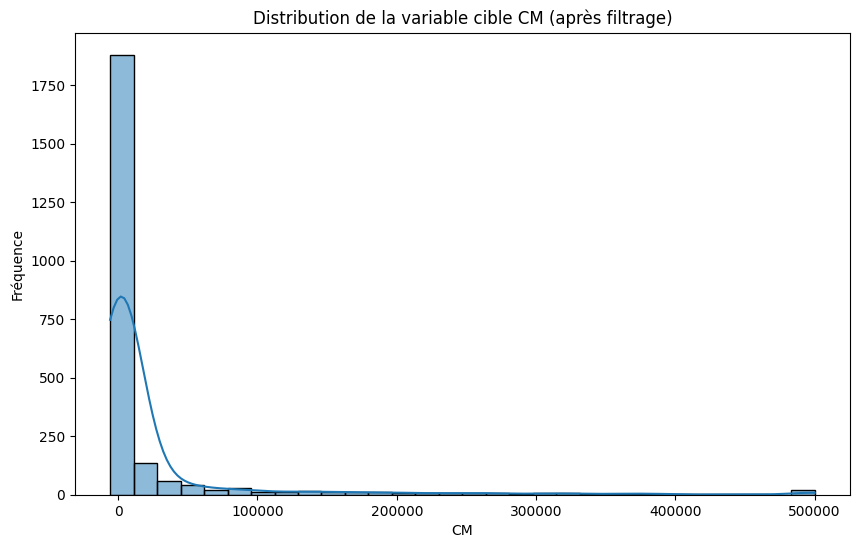

In [9]:
# On trace de nouveau la distribution de la variable cible : CM
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(y_train_filtered['CM'], bins=30, kde=True)
plt.title('Distribution de la variable cible CM (après filtrage)')
plt.xlabel('CM')
plt.ylabel('Fréquence')
plt.show()

In [10]:
# On enlève certaines colonnes qui ne sont pas nécessaires dans X_train_filtered et X_val

columns_delete = [
    "NBJTX25_MM_A", "NBJTX25_MMAX_A", "NBJTX25_MSOM_A", "NBJTX0_MM_A", "NBJTX0_MMAX_A", "NBJTX0_MSOM_A",
    "NBJTXI27_MM_A", "NBJTXI27_MMAX_A", "NBJTXI27_MSOM_A", "NBJTXS32_MM_A", "NBJTXS32_MMAX_A", "NBJTXS32_MSOM_A",
    "NBJTXI20_MM_A", "NBJTXI20_MMAX_A", "NBJTXI20_MSOM_A", "NBJTX30_MM_A", "NBJTX30_MMAX_A", "NBJTX30_MSOM_A",
    "NBJTX35_MM_A", "NBJTX35_MMAX_A", "NBJTX35_MSOM_A", "NBJTN10_MM_A", "NBJTN10_MMAX_A", "NBJTN10_MSOM_A",
    "NBJTNI10_MM_A", "NBJTNI10_MMAX_A", "NBJTNI10_MSOM_A", "NBJTN5_MM_A", "NBJTN5_MMAX_A", "NBJTN5_MSOM_A",
    "NBJTNS25_MM_A", "NBJTNS25_MMAX_A", "NBJTNS25_MSOM_A", "NBJTNI15_MM_A", "NBJTNI15_MMAX_A", "NBJTNI15_MSOM_A",
    "NBJTNI20_MM_A", "NBJTNI20_MMAX_A", "NBJTNI20_MSOM_A", "NBJTNS20_MM_A", "NBJTNS20_MMAX_A", "NBJTNS20_MSOM_A",
    "NBJTMS24_MM_A", "NBJTMS24_MMAX_A", "NBJTMS24_MSOM_A", "TAMPLIAB_VOR_MM_A", "TAMPLIAB_VOR_MMAX_A",
    "TAMPLIM_VOR_MM_A", "TAMPLIM_VOR_MMAX_A", "TM_VOR_MM_A", "TM_VOR_MMAX_A", "TMM_VOR_MM_A", "TMM_VOR_MMAX_A",
    "TMMAX_VOR_MM_A", "TMMAX_VOR_MMAX_A", "TMMIN_VOR_MM_A", "TMMIN_VOR_MMAX_A", "TN_VOR_MM_A", "TN_VOR_MMAX_A",
    "TNAB_VOR_MM_A", "TNAB_VOR_MMAX_A", "TNMAX_VOR_MM_A", "TNMAX_VOR_MMAX_A", "TX_VOR_MM_A", "TX_VOR_MMAX_A",
    "TXAB_VOR_MM_A", "TXAB_VOR_MMAX_A", "TXMIN_VOR_MM_A", "TXMIN_VOR_MMAX_A", "NBJFF10_MM_A", "NBJFF10_MMAX_A",
    "NBJFF10_MSOM_A", "NBJFF16_MM_A", "NBJFF16_MMAX_A", "NBJFF16_MSOM_A", "NBJFF28_MM_A", "NBJFF28_MMAX_A",
    "NBJFF28_MSOM_A", "NBJFXI3S10_MMAX_A", "NBJFXI3S10_MSOM_A", "NBJFXI3S16_MM_A", "NBJFXI3S16_MMAX_A",
    "NBJFXI3S16_MSOM_A", "NBJFXI3S28_MM_A", "NBJFXI3S28_MMAX_A", "NBJFXI3S28_MSOM_A", "NBJFXY8_MM_A",
    "NBJFXY8_MMAX_A", "NBJFXY8_MSOM_A", "NBJFXY10_MM_A", "NBJFXY10_MMAX_A", "NBJFXY10_MSOM_A", "NBJFXY15_MM_A",
    "NBJFXY15_MMAX_A", "NBJFXY15_MSOM_A", "FFM_VOR_MM_A", "FFM_VOR_MMAX_A", "FXI3SAB_VOR_MM_A", "FXI3SAB_VOR_MMAX_A",
    "FXIAB_VOR_MM_A", "FXIAB_VOR_MMAX_A", "FXYAB_VOR_MM_A", "FXYAB_VOR_MMAX_A", "FFM_vor_com_MM_A_y",
    "FFM_vor_com_MMAX_A_y", "FXI3SAB_vor_com_MM_A_y", "FXI3SAB_vor_com_MMAX_A_y", "NBJRR50_MM_A", "NBJRR50_MMAX_A",
    "NBJRR50_MSOM_A", "NBJRR1_MM_A", "NBJRR1_MMAX_A", "NBJRR1_MSOM_A", "NBJRR5_MM_A", "NBJRR5_MMAX_A",
    "NBJRR5_MSOM_A", "NBJRR10_MM_A", "NBJRR10_MMAX_A", "NBJRR10_MSOM_A", "NBJRR30_MM_A", "NBJRR30_MMAX_A",
    "NBJRR30_MSOM_A", "NBJRR100_MM_A", "NBJRR100_MMAX_A", "NBJRR100_MSOM_A", "RR_VOR_MM_A", "RR_VOR_MMAX_A",
    "RRAB_VOR_MM_A", "RRAB_VOR_MMAX_A"
]

columns_delete2 = [
    "distance_111", "distance_112", "distance_121", "distance_122", "distance_123", "distance_124",
    "distance_131", "distance_132", "distance_133", "distance_141", "distance_142", "distance_211",
    "distance_212", "distance_213", "distance_221", "distance_222", "distance_223", "distance_231",
    "distance_242", "distance_243", "distance_244", "distance_311", "distance_312", "distance_313",
    "distance_321", "distance_322", "distance_323", "distance_324", "distance_331", "distance_332",
    "distance_333", "distance_334", "distance_335", "distance_411", "distance_412", "distance_421",
    "distance_422", "distance_423", "distance_511", "distance_512", "distance_521", "distance_522",
    "distance_523", "proportion_11", "proportion_12", "proportion_13", "proportion_14", "Proportion_21",
    "proportion_22", "proportion_23", "proportion_24", "proportion_31", "proportion_32", "proportion_33",
    "proportion_41", "proportion_42", "proportion_51", "proportion_52"
]

# Convertir en majuscules
columns_delete2 = [col.upper() for col in columns_delete2]



# Filtrer les colonnes à supprimer qui existent réellement
columns_to_delete_in_train = [col for col in columns_delete if col in X_train_filtered.columns]
columns_to_delete_in_val = [col for col in columns_delete if col in X_val.columns]

columns_to_delete2_in_train = [col for col in columns_delete2 if col in X_train_filtered.columns]
columns_to_delete2_in_val = [col for col in columns_delete2 if col in X_val.columns]

# Afficher le nombre de colonnes avant la suppression
print("Nombre de colonnes dans X_train_filtered avant suppression :", X_train_filtered.shape[1])
print("Nombre de colonnes dans X_val avant suppression :", X_val.shape[1])

# Supprimer les colonnes existantes
X_train_filtered = X_train_filtered.drop(columns=columns_to_delete_in_train + columns_to_delete2_in_train, errors='ignore')
X_val = X_val.drop(columns=columns_to_delete_in_val + columns_to_delete2_in_val, errors='ignore')

# Afficher le nombre de colonnes restantes après la suppression
print("Nombre de colonnes restantes dans X_train_filtered :", X_train_filtered.shape[1])
print("Nombre de colonnes restantes dans X_val :", X_val.shape[1])


Nombre de colonnes dans X_train_filtered avant suppression : 374
Nombre de colonnes dans X_val avant suppression : 374
Nombre de colonnes restantes dans X_train_filtered : 191
Nombre de colonnes restantes dans X_val : 191


# Test des modèles

### XGBoost


In [11]:
# Importer les bibliothèques nécessaires
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Supprimer la colonne 'ID' si elle est présente dans X_train et X_val
X_train_filtered = X_train_filtered.drop(columns=['ID'])
X_val_filtered = X_val.drop(columns=['ID'])

# Définir l'espace des hyperparamètres à tester
param_dist = {
    'n_estimators': [100, 200, 500, 1000],  # Nombre d'arbres
    'max_depth': [3, 4, 5, 6, 7, 8],  # Profondeur maximale des arbres
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Taux d'apprentissage
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  # Fraction des données utilisées pour chaque arbre
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  # Fraction des colonnes utilisées pour chaque arbre
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],  # Paramètre de régularisation pour les arbres
    'reg_alpha': [0, 0.1, 0.5, 1],  # L1 regularization term
    'reg_lambda': [1, 1.5, 2, 2.5],  # L2 regularization term
}

# Initialiser le modèle XGBoost
xgb_model = XGBRegressor(
    objective='reg:squarederror',  # Fonction de perte pour la régression
    random_state=42,              # Pour la reproductibilité
    eval_metric='rmse'            # Évaluation de la performance sur RMSE
)

# Initialiser RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_model,  # Le modèle à optimiser
    param_distributions=param_dist,  # L'espace des hyperparamètres
    n_iter=100,  # Nombre d'itérations de la recherche aléatoire
    scoring='neg_mean_squared_error',  # Critère de performance
    cv=3,  # Validation croisée à 3 plis
    verbose=1,  # Afficher les informations pendant l'exécution
    random_state=42,  # Pour la reproductibilité
    n_jobs=-1  # Utiliser tous les cœurs de processeur
)

# Appliquer la recherche des hyperparamètres avec les données d'entraînement
random_search.fit(X_train_filtered, y_train_filtered['CM'])

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :")
print(random_search.best_params_)

# Utiliser le modèle avec les meilleurs hyperparamètres
best_xgb_model = random_search.best_estimator_

# Entraîner à nouveau avec les meilleurs paramètres
best_xgb_model.fit(X_train_filtered, y_train_filtered['CM'])

# Prédire avec le modèle optimal sur les données de validation
y_pred_xgb = best_xgb_model.predict(X_val_filtered)


# Créer un DataFrame pour les prédictions
pred_df_xgb = pd.DataFrame({
    'ID': X_val['ID'].values,
    'CM_pred': y_pred_xgb
})

# Ajouter les colonnes 'FREQ' et 'ANNEE_ASSURANCE' depuis y_val
pred_df_xgb = pred_df_xgb.merge(y_val[['ID', 'FREQ', 'ANNEE_ASSURANCE']], on='ID', how='left')

# Si FREQ = 0, transformer CM_pred en 0
pred_df_xgb.loc[pred_df_xgb['FREQ'] == 0, 'CM_pred'] = 0

# Ajouter la colonne 'CM_true' depuis y_val pour comparaison
pred_df_xgb = pred_df_xgb.merge(y_val[['ID', 'CM']], on='ID', how='left')
pred_df_xgb.rename(columns={'CM': 'CM_true'}, inplace=True)

# Calculer les erreurs absolues
pred_df_xgb['error'] = np.abs(pred_df_xgb['CM_pred'] - pred_df_xgb['CM_true'])

# Afficher un aperçu des prédictions et des erreurs
print("Aperçu des prédictions et des erreurs :")
display(pred_df_xgb[['ID', 'FREQ', 'ANNEE_ASSURANCE', 'CM_pred', 'CM_true', 'error']].head())

# Évaluer les performances du modèle
mse_xgb = mean_squared_error(pred_df_xgb['CM_true'], pred_df_xgb['CM_pred'])
r2_xgb = r2_score(pred_df_xgb['CM_true'], pred_df_xgb['CM_pred'])
rmse_xgb = np.sqrt(mse_xgb)

# Afficher les résultats
print("Performance du modèle XGBoost :")
print(f"Mean Squared Error (MSE) : {mse_xgb}")
print(f"R2 Score : {r2_xgb}")
print(f"Root Mean Squared Error (RMSE) : {rmse_xgb}")

# Enregistrer les prédictions dans un fichier CSV
pred_df_xgb.to_csv('/Users/sabine/Desktop/CYTech/S3/Data_science/ProjetFinal/04.Rendu/predictions_xgb.csv', index=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Meilleurs hyperparamètres :
{'subsample': 0.7, 'reg_lambda': 2.5, 'reg_alpha': 0.5, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.6}
Aperçu des prédictions et des erreurs :


,ID,FREQ,ANNEE_ASSURANCE,CM_pred,CM_true,error
0,80051,0.0,0.923288,0.0,0.0,0.0
1,34635,0.0,0.200000,0.0,0.0,0.0
2,63169,0.0,1.000000,0.0,0.0,0.0
3,134613,0.0,0.328767,0.0,0.0,0.0
4,238464,0.0,0.896175,0.0,0.0,0.0


Performance du modèle XGBoost :
Mean Squared Error (MSE) : 39774183.303180866
R2 Score : 0.1533237466177899
Root Mean Squared Error (RMSE) : 6306.677675542081


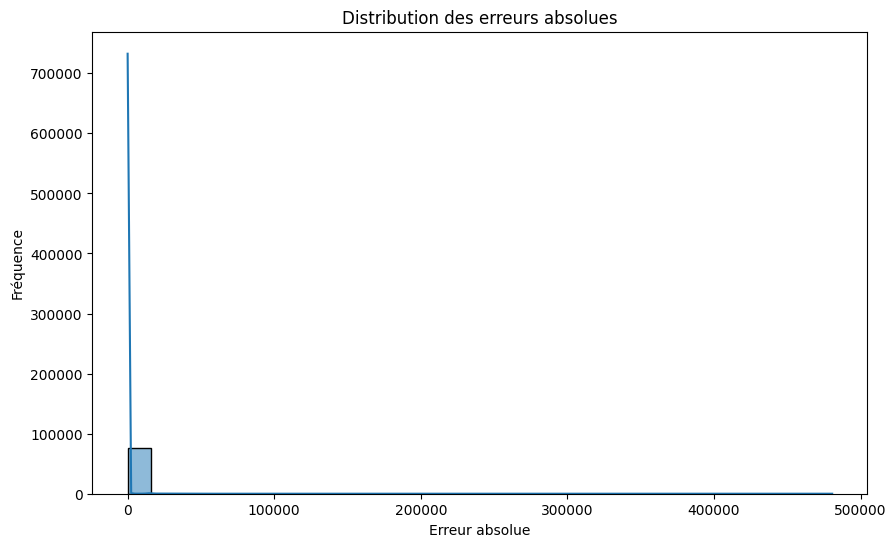

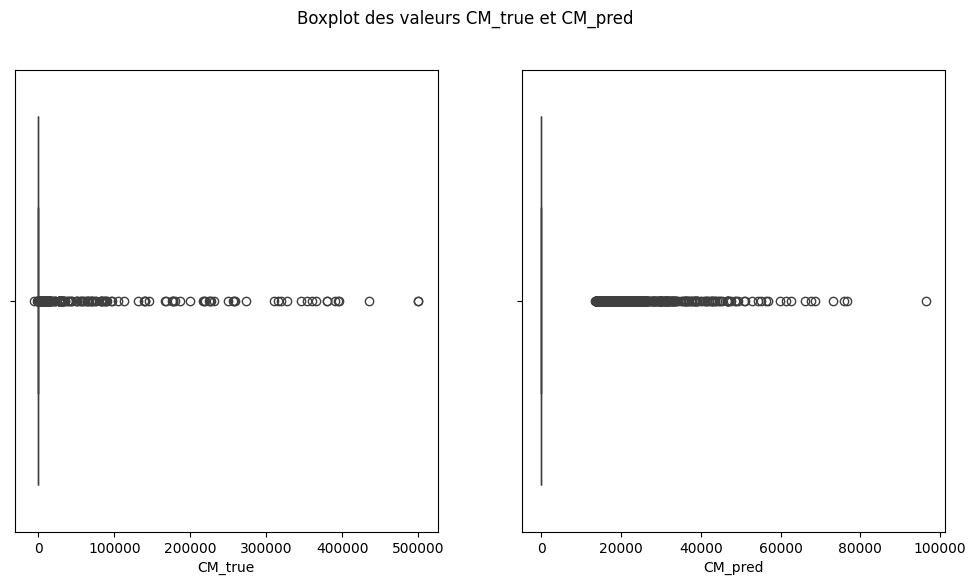

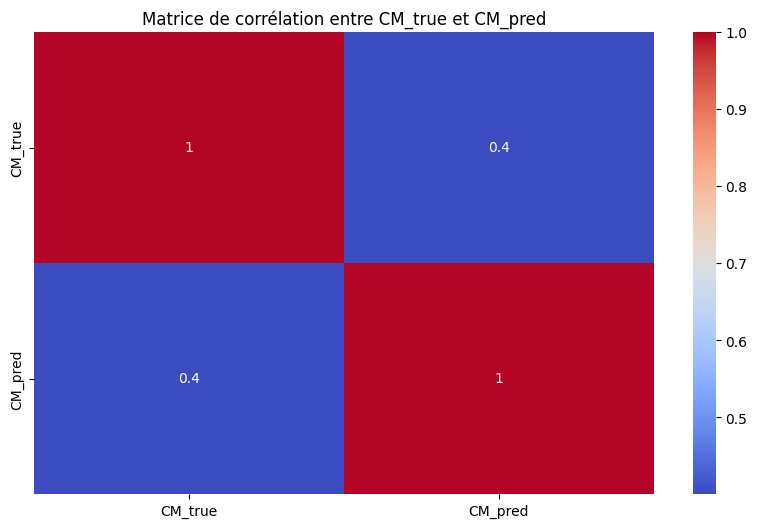

In [17]:
# Afficher graphiquement les erreurs absolues
plt.figure(figsize=(10, 6))
sns.histplot(pred_df_xgb['error'], bins=30, kde=True)
plt.title('Distribution des erreurs absolues')
plt.xlabel('Erreur absolue')
plt.ylabel('Fréquence')
plt.show()

# Afficher 2 boxplot avec les variables 'CM_true' et 'CM_pred' en 2 colonnes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=pred_df_xgb, x='CM_true')
plt.subplot(1, 2, 2)
sns.boxplot(data=pred_df_xgb, x='CM_pred')
plt.suptitle('Boxplot des valeurs CM_true et CM_pred')
plt.show()

# Afficher la matrice de corrélation pour la variable cible 'CM' et les prédictions 'CM_pred'
plt.figure(figsize=(10, 6))
sns.heatmap(pred_df_xgb[['CM_true', 'CM_pred']].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation entre CM_true et CM_pred')
plt.show()

/var/folders/w9/r08bt9mx78n17by79wcdsq380000gn/T/ipykernel_66142/305801043.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette=['#800000'] * len(importance_df))  # Couleur bordeaux


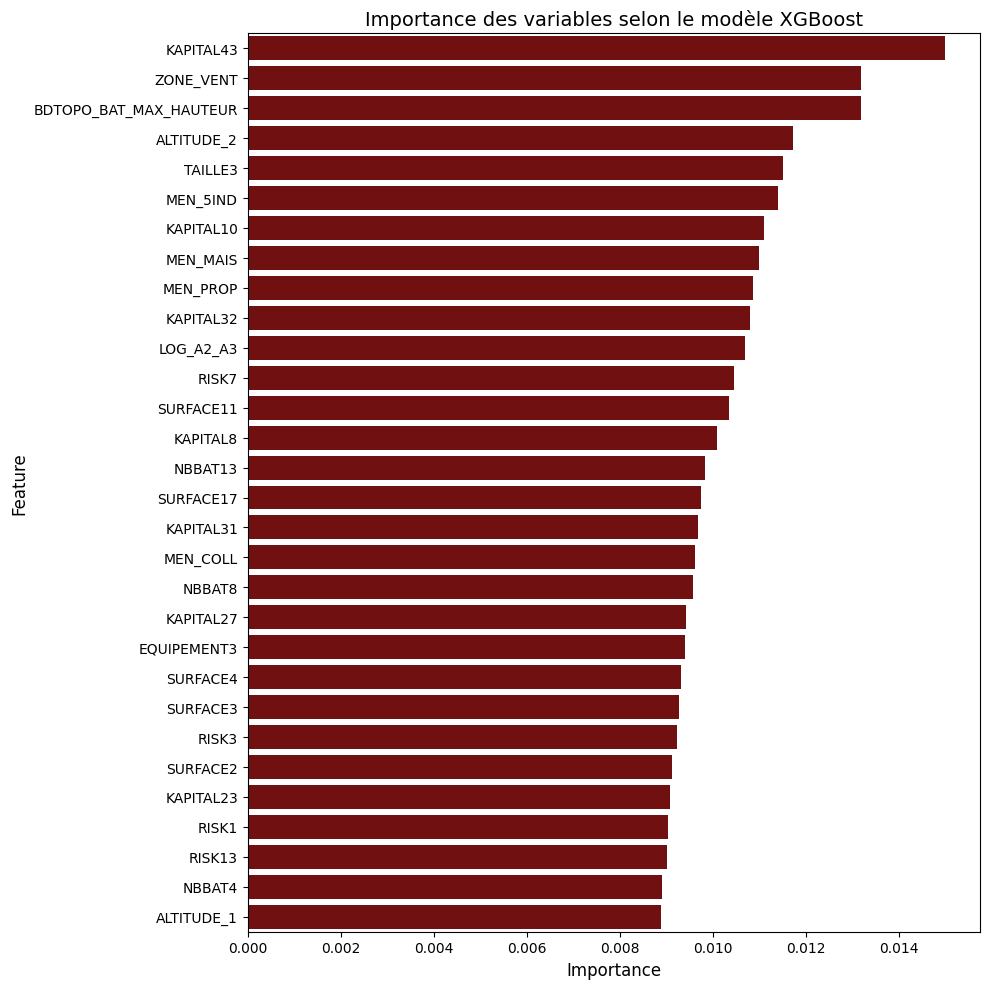

Variables les plus importantes :


,Feature,Importance
80,KAPITAL43,0.015000
179,ZONE_VENT,0.013195
178,BDTOPO_BAT_MAX_HAUTEUR,0.013189
171,ALTITUDE_2,0.011722
115,TAILLE3,0.011518
143,MEN_5IND,0.011408
47,KAPITAL10,0.011094
147,MEN_MAIS,0.010993
144,MEN_PROP,0.010872
69,KAPITAL32,0.010808


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtenir l'importance des variables
importances = best_xgb_model.feature_importances_

# Créer un DataFrame avec les variables et leurs importances
features = X_train_filtered.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Trier les variables par ordre d'importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualiser l'importance des variables pour les 30 premières uniquement
importance_df = importance_df.head(30)

# Tracer l'importance des variables avec des barres en bordeaux
plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette=['#800000'] * len(importance_df))  # Couleur bordeaux
plt.title('Importance des variables selon le modèle XGBoost', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()  # Ajuste automatiquement les marges
plt.show()

print("Variables les plus importantes :")
display(importance_df)

In [15]:
# Entrainer un modèle de randomforest sur les données filtrées
from sklearn.ensemble import RandomForestRegressor

# Créer une instance du modèle RandomForest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Transformer tous les valeurs NaN en 0
X_train_filtered = X_train_filtered.fillna(0)
y_train_filtered = y_train_filtered.fillna(0)
X_val_filtered = X_val_filtered.fillna(0)

# Entraîner le modèle sur les données d'entraînement filtrées
rf_model.fit(X_train_filtered, y_train_filtered['CM'])

# Prédire sur les données de validation
y_pred_rf = rf_model.predict(X_val_filtered)

# Créer un DataFrame pour les prédictions
pred_df_rf = pd.DataFrame({
    'ID': X_val['ID'].values,
    'CM_pred': y_pred_rf
})

# Ajouter les colonnes 'FREQ' et 'ANNEE_ASSURANCE' depuis y_val
pred_df_rf = pred_df_rf.merge(y_val[['ID', 'FREQ', 'ANNEE_ASSURANCE']], on='ID', how='left')

# Si FREQ = 0, transformer CM_pred en 0
pred_df_rf.loc[pred_df_rf['FREQ'] == 0, 'CM_pred'] = 0

# Ajouter la colonne 'CM_true' depuis y_val pour comparaison
pred_df_rf = pred_df_rf.merge(y_val[['ID', 'CM']], on='ID', how='left')
pred_df_rf.rename(columns={'CM': 'CM_true'}, inplace=True)

# Calculer les erreurs absolues
pred_df_rf['error'] = np.abs(pred_df_rf['CM_pred'] - pred_df_rf['CM_true'])

# Afficher un aperçu des prédictions et des erreurs
print("Aperçu des prédictions et des erreurs :")
display(pred_df_rf[['ID', 'FREQ', 'ANNEE_ASSURANCE', 'CM_pred', 'CM_true', 'error']].head())

# Évaluer les performances du modèle
mse_rf = mean_squared_error(pred_df_rf['CM_true'], pred_df_rf['CM_pred'])
r2_rf = r2_score(pred_df_rf['CM_true'], pred_df_rf['CM_pred'])
rmse_rf = np.sqrt(mse_rf)

# Afficher les résultats
print("Performance du modèle Random Forest :")
print(f"Mean Squared Error (MSE) : {mse_rf}")
print(f"R2 Score : {r2_rf}")
print(f"Root Mean Squared Error (RMSE) : {rmse_rf}")


Aperçu des prédictions et des erreurs :


,ID,FREQ,ANNEE_ASSURANCE,CM_pred,CM_true,error
0,80051,0.0,0.923288,0.0,0.0,0.0
1,34635,0.0,0.200000,0.0,0.0,0.0
2,63169,0.0,1.000000,0.0,0.0,0.0
3,134613,0.0,0.328767,0.0,0.0,0.0
4,238464,0.0,0.896175,0.0,0.0,0.0


Performance du modèle Random Forest :
Mean Squared Error (MSE) : 42637897.17079323
R2 Score : 0.09236363815480086
Root Mean Squared Error (RMSE) : 6529.770070285264


In [16]:
# Combiner les prédictions des deux modèles
pred_df_combined = pred_df_xgb[['ID', 'CM_pred']].copy()
pred_df_combined.rename(columns={'CM_pred': 'CM_pred_xgb'}, inplace=True)
pred_df_combined = pred_df_combined.merge(pred_df_rf[['ID', 'CM_pred']], on='ID', how='left')
pred_df_combined.rename(columns={'CM_pred': 'CM_pred_rf'}, inplace=True)
pred_df_combined['CM_pred_combined'] = (pred_df_combined['CM_pred_xgb'] + pred_df_combined['CM_pred_rf']) / 2

#Ajouter la colonne CM_true de y_val
pred_df_combined = pred_df_combined.merge(y_val[['ID', 'CM']], on='ID', how='left')
pred_df_combined.rename(columns={'CM': 'CM_true'}, inplace=True)

#Ajouter les colonnes 'FREQ' et 'ANNEE_ASSURANCE' depuis y_val
pred_df_combined = pred_df_combined.merge(y_val[['ID', 'FREQ', 'ANNEE_ASSURANCE']], on='ID', how='left')

# Si FREQ = 0, transformer CM_pred en 0
pred_df_combined.loc[pred_df_combined['FREQ'] == 0, 'CM_pred_combined'] = 0
pred_df_combined.loc[pred_df_combined['FREQ'] == 0, 'CM_pred_xgb'] = 0
pred_df_combined.loc[pred_df_combined['FREQ'] == 0, 'CM_pred_rf'] = 0

pred_df_combined['error_combined'] = np.abs(pred_df_combined['CM_pred_combined'] - pred_df_combined['CM_true'])
pred_df_combined['error_xgb'] = np.abs(pred_df_combined['CM_pred_xgb'] - pred_df_combined['CM_true'])
pred_df_combined['error_lin'] = np.abs(pred_df_combined['CM_pred_rf'] - pred_df_combined['CM_true'])

# Afficher un aperçu des prédictions combinées et des erreurs
print("Aperçu des prédictions combinées et des erreurs :")
display(pred_df_combined[['ID', 'FREQ', 'ANNEE_ASSURANCE', 'CM_pred_xgb', 'CM_pred_rf', 'CM_pred_combined', 'CM_true', 'error_combined']].head())

# Évaluer les performances du modèle combiné
mse_combined = mean_squared_error(pred_df_combined['CM_true'], pred_df_combined['CM_pred_combined'])
r2_combined = r2_score(pred_df_combined['CM_true'], pred_df_combined['CM_pred_combined'])
rmse_combined = np.sqrt(mse_combined)

# Afficher les résultats
print("Performance du modèle combiné :")
print(f"Mean Squared Error (MSE) : {mse_combined}")
print(f"R2 Score : {r2_combined}")
print(f"Root Mean Squared Error (RMSE) : {rmse_combined}")

Aperçu des prédictions combinées et des erreurs :


,ID,FREQ,ANNEE_ASSURANCE,CM_pred_xgb,CM_pred_rf,CM_pred_combined,CM_true,error_combined
0,80051,0.0,0.923288,0.0,0.0,0.0,0.0,0.0
1,34635,0.0,0.200000,0.0,0.0,0.0,0.0,0.0
2,63169,0.0,1.000000,0.0,0.0,0.0,0.0,0.0
3,134613,0.0,0.328767,0.0,0.0,0.0,0.0,0.0
4,238464,0.0,0.896175,0.0,0.0,0.0,0.0,0.0


Performance du modèle combiné :
Mean Squared Error (MSE) : 40129592.479563154
R2 Score : 0.14575812276617595
Root Mean Squared Error (RMSE) : 6334.792220709623
